## COLEGIO DE CIENCIAS E INGENIERÍA
## INGENIERÍA INDUSTRIAL
## IIN-3007 ANALÍTICA DE DATOS
## NRC: 2573
## Proyecto - Avance 1 - Código
## SEMESTRE: Segundo Semestre 2022-2023 (202220)
## NOMBRES Y CÓDIGOS DE ESTUDIANTES: Francisco Campoverde (00322891) - Akemi Tadashima (00320567) - David Layedra (00211028)
## PROFESOR(A): María Gabriela Baldeón Calisto
## FECHA DE ENTREGA: 11/04/2023

##### Primero, cargamos la base de datos del hospital en el jupyter notebook 

In [1]:
import pandas as pd    #Primero importamos la librería pandas
hospital_data= pd.read_csv("PublicHospitalDataset.csv", encoding='cp1252')#Se utliza un encoding para poder leer el archivo csv

###### Referencias

Tim Woocker. (18 de marzo del 2018). Importing csv file produces an error. Recuperado el 15 de marzo del 2023 de:https://stackoverflow.com/questions/49545258/importing-csv-file-produces-an-error

###### Primer vistazo a la base de datos

In [2]:
hospital_data.head(10)  #Se revisan las primeras 10 observaciones

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
5,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Male,81.0,1
6,1,1,Yes,Private,Rural,70.09,27.4,never smoked,Male,74.0,1
7,0,0,No,Private,Urban,94.39,22.8,never smoked,Female,69.0,1
8,0,0,Yes,k–sdh-k,Rural,76.15,NaN,Unknown,Female,59.0,1
9,0,0,Yes,Private,Urban,58.57,24.2,Unknown,Female,78.0,1


In [3]:
hospital_data['Stroke'].value_counts()   #Se revisan cuántos pacientes han tenido un stroke

0    4861
1     249
Name: Stroke, dtype: int64

Es una cantidad muy baja de pacientes que han tenido un ataque cerebral con respecto a los que no

In [4]:
hospital_data.head(165)   #Se revisan las observaciones 160 a 164

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.00,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.00,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.00,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.00,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.00,1
...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,Female,76.00,1
161,0,1,Yes,Private,Urban,81.76,NaN,smokes,Male,71.00,1
162,0,0,No,children,Urban,70.37,NaN,Unknown,Female,1.32,1
163,1,0,No,Private,Urban,203.87,45.7,never smoked,Female,78.00,1


Parecen estar primero las observaciones de pacientes que ha tenido un stroke

# Exploratory Data Analysis (EDA)

Generar un Exploratory Data Analysis (EDA) en Python: se deben incluir, por lo menos, los
siguientes puntos (sin estar únicamente limitados a los mismos):

1.1 Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores
nulos/blancos, valores atípicos

1.2 Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo
con ellos?, ¿cómo los gestionaron?, etc.

1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la
variable respuesta?

1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución.
Analice la distribución de la variable respuesta.

### 1.1 Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores nulos/blancos, valores atípicos

#### Tamaño

In [5]:
hospital_data.shape #.shape nos permite ver las dimensiones del dataframe
#Hay 5110 observaciones y 11 variables (10 predictivas y 1 de respuesta)

(5110, 11)

#### Tipos de datos

In [6]:
hospital_data.dtypes   #.dtypes nos permite ver los tipos de las variables
#Las variables Hypertension, Heart Disease, Stroke representan variables binarias (1 ó 0, por esos son de tipo entero)
#Las variables Married, Work, Residence, Smoking, Gender representan variables categóricas, por eso son tipo objeto
#Las variables Avg_glucose_level, Bmi y Age representan variables numéricas cuantitativas continuas, por eso son de tipo float

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

#### Valores nulos/blanco

In [7]:
hospital_data.count() #Al aplicar .count() al dataframe devuelve el número de observaciones con los que cuenta cada columna (variable)
#Solo la variable bmi no tiene datos de todas las observaciones

Hypertension         5110
Heart Disease        5110
Married              5110
Work                 5110
Residence            5110
Avg_glucose_level    5110
Bmi                  4909
Smoking              5110
Gender               5110
Age                  5110
Stroke               5110
dtype: int64

In [8]:
hospital_data.isnull().sum(axis=0) # Suma los valores nulos/blancos de todas las columnas (variables) 
#A la variable bmi le faltan datos de 201 observaciones

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

In [9]:
round(hospital_data["Bmi"].isnull().sum()/len(hospital_data["Bmi"]) * 100, 3) #Se redondea con 3 decimales la división del
#número de valores nulos/blancos de la columna bmi con respecto al número total de observaciones del data set
#Se tiene aproximadamente un 4% de observaciones con valores nulos en la variable Bmi

3.933

#### Valores atípicos

###### Para variables cuantitativas continuas y binarias

In [10]:
hospital_data.describe() #Se obtienen distintas métricas solo para las variables cuantitativas del dataset

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


- Se observa un valor imposible máximo de Bmi de 40000, parece un valor atípico aislado debido a que el cuartil 75 está muy separado
- En la variable del nivel de glucosa no se observan problemas con los datos registrados, representan la naturaleza de esta variable
- Como los valores mínimos del bmi y del promedio del nivel de glucosa son positivos, descartamos la posibilidad de que hayan valores negativos

In [11]:
print(hospital_data["Bmi"].unique()) #Se imprimen los valores únicos que puede tomar la variable Bmi
#Se revisa rapidamente los valores únicos de la variable Bmi

[3.66e+01      nan 3.25e+01 3.44e+01 2.40e+01 2.90e+01 2.74e+01 2.28e+01
 2.42e+01 2.97e+01 3.68e+01 2.73e+01 2.82e+01 3.09e+01 3.75e+01 2.58e+01
 3.78e+01 2.24e+01 4.89e+01 2.66e+01 2.72e+01 2.35e+01 2.83e+01 4.42e+01
 2.54e+01 2.22e+01 3.05e+01 2.65e+01 3.37e+01 2.31e+01 3.20e+01 2.99e+01
 2.39e+01 2.85e+01 2.64e+01 2.02e+01 3.36e+01 3.86e+01 3.92e+01 2.77e+01
 3.14e+01 3.65e+01 3.32e+01 3.28e+01 4.04e+01 2.53e+01 3.02e+01 4.75e+01
 2.03e+01 3.00e+01 2.89e+01 2.81e+01 3.11e+01 2.17e+01 2.70e+01 2.41e+01
 4.59e+01 4.41e+01 2.29e+01 2.91e+01 3.23e+01 4.11e+01 2.56e+01 2.98e+01
 2.63e+01 2.62e+01 2.94e+01 2.44e+01 2.80e+01 2.88e+01 3.46e+01 1.94e+01
 3.03e+01 4.15e+01 2.26e+01 5.66e+01 2.71e+01 3.13e+01 3.10e+01 3.17e+01
 3.58e+01 2.84e+01 2.01e+01 2.67e+01 3.87e+01 3.49e+01 2.50e+01 2.38e+01
 2.18e+01 2.75e+01 2.46e+01 3.29e+01 2.61e+01 3.19e+01 3.41e+01 3.69e+01
 3.73e+01 4.57e+01 3.42e+01 2.36e+01 2.23e+01 3.71e+01 4.50e+01 2.55e+01
 3.08e+01 3.74e+01 3.45e+01 2.79e+01 2.95e+01 4.60e

In [12]:
print(hospital_data["Avg_glucose_level"].unique())  #Se imprimen los valores únicos que puede tomar la variable Avg_glucose_level
#Se revisa rapidamente los valores únicos de la variable Avg_glucose_level

[228.69 202.21 105.92 ...  82.99 166.29  85.28]


###### Para variables categóricas

###### Variable Married

In [13]:
hospital_data["Married"].value_counts() #Devuelve una serie que contiene recuentos de valores únicos de la variable seleccionada

Yes    3353
No     1757
Name: Married, dtype: int64

###### Variable Work

In [14]:
hospital_data["Work"].value_counts() #recuento de valores únicos de la variable work

Private          2919
Self-employed     818
children          687
Govt_job          657
Never_worked       22
sdfsdf              3
dsfsdf              2
k–sdh-k             1
sdsd-i              1
Name: Work, dtype: int64

- Se encontraron 7 observaciones que pertenecen a 4 categorías que no existen: sdfsdf, dsfsdf, k–sdh-k y sdsd-i 

###### Variable Residence

In [15]:
hospital_data["Residence"].value_counts() #recuento de valores únicos de la variable residence

Urban    2596
Rural    2514
Name: Residence, dtype: int64

###### Variable Smoking

In [16]:
hospital_data["Smoking"].value_counts()  #recuento de valores únicos de la variable smoking

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking, dtype: int64

###### Variable Gender

In [17]:
hospital_data["Gender"].value_counts()    #recuento de valores únicos de la variable gender

Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64

- Se encontró que tan solo una observación pertenece a la categoría Other en la variable Gender

### Limpieza de datos

¿Cuál es mi población?

-Adultos en riesgo de tener accidentes cerebrovasculares

-Criterios de inclusión: Personas desde los 18 años, son las únicas que no están condicionadas a tener un determinada clase de las variables predictivas categóricas

In [18]:
data_adults=hospital_data[hospital_data["Age"] >= 18] #Se crea un nuevo dataframe con solo las observaciones de personas
#con o más de 18 años
data_adults

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


#### Tamaño

In [19]:
data_adults.shape  #.shape nos permite ver las dimensiones del dataframe
#Ahora hay 4254 observaciones y 11 variables (10 predictivas y 1 de respuesta)

(4254, 11)

#### Tipo de datos

In [20]:
data_adults.dtypes  #.dtypes nos permite ver los tipos de las variables
#Se siguen manteniendo los mismos tipos de variables de antes

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

#### Transformar variable Age tipo float a int

In [21]:
#Como ahora ya no se tienen edades con decimales, se transforma la variable age tipo float a int 
data_adults['Age'] = data_adults['Age'].astype(int)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_20052/223727653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adults['Age'] = data_adults['Age'].astype(int)


In [22]:
display(data_adults.dtypes) #Se ven de qué tipo son las variables
#Ahora Age es una variable cuantitativa discreta, tipo entero

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                    int32
Stroke                 int64
dtype: object

#### Valores nulos/blancos

In [23]:
data_adults.count() #Al aplicar .count() al dataframe devuelve el número de observaciones con los que cuenta cada columna (variable)
#Vemos de nuevo que la variable bmi no tiene datos de todas las observaciones

Hypertension         4254
Heart Disease        4254
Married              4254
Work                 4254
Residence            4254
Avg_glucose_level    4254
Bmi                  4073
Smoking              4254
Gender               4254
Age                  4254
Stroke               4254
dtype: int64

In [24]:
data_adults.isnull().sum(axis=0) # Suma los valores nulos/blancos de todas las columnas (variables) 

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  181
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

Ahora, a la variable bmi le faltan datos de 181 observaciones

In [25]:
round(data_adults["Bmi"].isnull().sum()/len(data_adults["Bmi"]) * 100, 3)  #Se redondea con 3 decimales la división del
#número de valores nulos/blancos de la columna bmi con respecto al número total de observaciones del nuevo data set

4.255

Ahora, se tiene aproximadamente un 4.25% de observaciones con valores nulos en la variable Bmi

#### Valores atípicos
###### Para variables cuantitativas continuas y binarias

In [26]:
data_adults.describe() #Se obtienen distintas métricas solo para las variables cuantitativas del nuevo dataset

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,4254.000000,4254.000000,4254.000000,4073.000000,4254.000000,4254.000000
mean,0.116831,0.064645,108.514394,50.055291,50.202163,0.058063
std,0.321257,0.245927,47.769400,885.622076,17.829035,0.233890
min,0.000000,0.000000,55.120000,11.300000,18.000000,0.000000
25%,0.000000,0.000000,77.482500,25.400000,36.000000,0.000000
50%,0.000000,0.000000,92.465000,29.200000,50.500000,0.000000
75%,0.000000,0.000000,116.135000,34.200000,64.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


- Se sigue observando un valor imposible máximo de Bmi de 40000, parece un valor atípico aislado debido a que el percentil 75 está muy separado
- En la variable del nivel de glucosa se sigue sin observar problemas con los datos registrados, representan la naturaleza de esta variable
- Como los valores mínimos del bmi y del promedio del nivel de glucosa son positivos, descartamos la posibilidad de que hayan valores negativos

###### Para variables categóricas

###### Variable Married

In [27]:
data_adults["Married"].value_counts() #recuentos de valores únicos de la variable married

Yes    3353
No      901
Name: Married, dtype: int64

###### Variable Work

In [28]:
data_adults["Work"].value_counts() #recuentos de valores únicos de la variable work

Private          2785
Self-employed     806
Govt_job          651
Never_worked        5
sdfsdf              3
dsfsdf              2
k–sdh-k             1
sdsd-i              1
Name: Work, dtype: int64

- Se siguen contando 7 observaciones que pertenecen a 4 categorías que no existen: sdfsdf, dsfsdf, k–sdh-k y sdsd-i 

###### Variable Residence

In [29]:
data_adults["Residence"].value_counts() #recuentos de valores únicos de la variable residence

Urban    2169
Rural    2085
Name: Residence, dtype: int64

###### Variable Smoking

In [30]:
data_adults["Smoking"].value_counts()   #recuentos de valores únicos de la variable smoking

never smoked       1752
Unknown             862
formerly smoked     860
smokes              780
Name: Smoking, dtype: int64

###### Variable Gender

In [31]:
data_adults["Gender"].value_counts()   #recuentos de valores únicos de la variable gender

Female    2576
Male      1677
Other        1
Name: Gender, dtype: int64

- Se sigue encontrando que tan solo una observación pertenece a la categoría Other en la variable Gender

### 1.2 Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo con ellos?, ¿cómo los gestionaron?, etc.

##### Para manejar los valores atipicos y nulos:

- Bmi: remover valores extremos (sin sentido) y manejar valores atípicos y nulos
- Work: remover observaciones con categorias que no existen
- Gender: remover una observación que pertenece a la categoría other
- Transformar la variable Married a binary

##### Para la variable bmi:

Se buscan cuáles son las observaciones que tienen un valor de bmi mayor a 100, como el valor máximo de 40000 que vimos, ya que representan un valor imposible de obtener de bmi

In [32]:
data_adults[data_adults["Bmi"] > 100] #Se buscan cuáles son las observaciones que tienen un valor de bmi mayor a 100 

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
4661,0,0,Yes,Private,Rural,88.17,40000.0,formerly smoked,Female,33,0
4822,1,0,Yes,Private,Rural,57.15,40000.0,never smoked,Female,63,0


Se eliminan estas 2 observaciones ya que tienen valores atípicos muy grandes de 40,000

In [33]:
cleaned_data = data_adults.copy()  #Se crea un nuevo dataframe "cleaned data" como una copia de data_adults para 
#no cambiar el dataframe inicial
cleaned_data = cleaned_data[(cleaned_data["Bmi"] != 40000)] #En "cleaned data" se excluyen las observaciones con bmi = 40,000

Dataframe queda de esta manera:

In [34]:
cleaned_data

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,0


Quedaron 4252 observaciones

#### Se analiza la distribución de la variable bmi para tener una mejor apreciación de los valores atípicos

In [35]:
import seaborn as sns       #Se importan las librerías necesarias
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

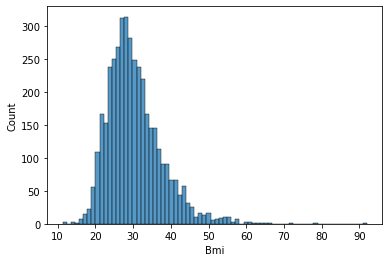

In [36]:
sns.histplot(data=cleaned_data, x="Bmi") #Se grafica un histograma que representa la distribución de la variable Bmi sin
#esos valores atípicos extremos 

In [37]:
cleaned_data["Bmi"].describe()  #Se analizan distintas métricas como la media, la desviación estándar, min, max
#solo para la variable bmi

count    4071.000000
mean       30.428691
std         7.234598
min        11.300000
25%        25.400000
50%        29.200000
75%        34.150000
max        92.000000
Name: Bmi, dtype: float64

- Debido a que en bibliografía se encontró que la distribución del bmi generalmente va desde un valor de 12 hasta uno de 45 aproximadamente, se van a buscar outliers
- Se va a revisar las dos técnicas para considerar datos atípicos: 1) aquellos valores que están afuera de las 3 desviaciones estándar, 2) Valores mayores al 1.5 rango intercuartil

#### Referencias
Silverman, M. P. (2022). Exact Statistical Distribution of the Body Mass Index (BMI): Analysis and Experimental Confirmation. Open Journal of Statistics, 12(3).

Lee, J. (2022) “[code in python] working with outliers,” Medium, Medium, [online] Available from: https://jedleee.medium.com/code-in-python-working-with-outliers-fb159f7f7c21 (Accessed 7 April 2023). 

##### 1) Aquellos valores de bmi que están afuera de las 3 desviaciones estándar

In [38]:
mean = 30.428691 #Se obtuvo mean y std del paso anterior al aplicar .describe()
std = 7.234598
print("bmi value will be an outlier if it is greater than", (mean+(3*std)))  #Se obtiene el valor de la media más 3 desviaciones estándar

bmi value will be an outlier if it is greater than 52.132485


In [39]:
cleaned_data[cleaned_data["Bmi"] > 52.132485] #Se busca las observaciones con valores de bmi mayores a este valor

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
113,0,0,Yes,Private,Rural,224.10,56.6,never smoked,Female,45,1
258,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,Female,74,0
270,1,0,Yes,Private,Rural,129.54,60.9,smokes,Female,57,0
333,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,Female,52,0
358,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,Male,52,0
430,0,1,Yes,Private,Urban,72.79,54.7,never smoked,Female,52,0
466,1,0,Yes,Private,Rural,170.05,60.2,smokes,Female,61,0
544,0,0,Yes,Private,Rural,210.48,71.9,never smoked,Male,42,0
637,0,0,Yes,Private,Rural,112.43,54.6,never smoked,Female,56,0
662,0,0,Yes,Private,Urban,87.43,55.7,Unknown,Male,28,0


Las cuales corresponden a 57 observaciones

In [40]:
cleaned_data[cleaned_data["Bmi"] >= 52.132485 ].count() #Se cuenta el número de observaciones con la anterior condición

Hypertension         57
Heart Disease        57
Married              57
Work                 57
Residence            57
Avg_glucose_level    57
Bmi                  57
Smoking              57
Gender               57
Age                  57
Stroke               57
dtype: int64

##### 2) Valores mayores al 1.5 rango intercuartil

In [41]:
#Se obtienen los valores del cuartil 1 y 3 del metodo decribe() aplicado anteriormente
q1=25.400000
q3=34.150000
IQR=q3-q1 #Se obtiene el rango intercuartil
print("IQR =", IQR)
print("bmi value will be an outlier if it is greater than", (q3+(1.5*IQR))) #Se obtiene el valor que es 1.5 veces el rango intercuartil

IQR = 8.75
bmi value will be an outlier if it is greater than 47.275


In [42]:
cleaned_data[cleaned_data["Bmi"] >= 47.275 ].count() #Se cuenta el número de observaciones con la anterior condición

Hypertension         113
Heart Disease        113
Married              113
Work                 113
Residence            113
Avg_glucose_level    113
Bmi                  113
Smoking              113
Gender               113
Age                  113
Stroke               113
dtype: int64

Al ser más bajo el valor desde donde se consideran outliers, su cantidad aumentó a 113 observaciones

- Después de revisar los dos métodos, se decide tomar a outliers como aquellos mayores a 47.275, debido a que en bibliografía se encontró que la distribución del bmi generalmente va desde un valor de 12 hasta uno de 45 aproximadamente, como se mencionó anteriormente

#### 1era Alternativa) Se intentará utilizar el método "Cortar basado en el percentil" para remplazar estos outliers con el valor del bmi del percentil 95

In [43]:
print("95th Percentile")
print(cleaned_data["Bmi"].quantile(0.95)) #Se obtiene el percentil 95 del dataset cleaned data y se imprime su valor
print()

95th Percentile
43.7



In [44]:
cleaned_data_try = cleaned_data.copy()  #Se hace una copia del dataframe clenaned_data que no tiene los 2 valores
                                        #extremos del bmi de 40,000
cleaned_data_try.loc[cleaned_data_try['Bmi'] > 47.275, 'Bmi'] = 43.7 #Se remplazan los valores  atípicos que son los 
                                                                    #mayores a 47.275 por el valor 43.7

In [45]:
cleaned_data_try  #Se imprime el nuevo dataframe

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,0


#### Se analiza la nueva distribución de la variable bmi al reemplazar los valores atípicos 

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

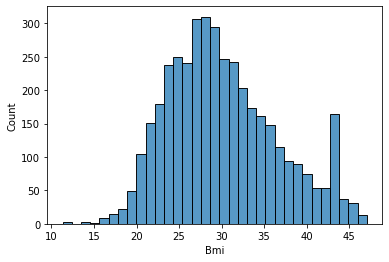

In [46]:
sns.histplot(data=cleaned_data_try, x="Bmi") #Se grafica un histograma que representa la distribución de la variable Bmi

- Se analiza como quedó la distribución después de aplicar esta técnica y se puede ver que la cantidad de observaciones que pertenencen al percentil 95 aumento considerablemente, que corresponde al valor de bmi de 43 aproximadamente
- Por esta razón se considera que esta técnica puede afectar a la distribución y generar un sesgo, por lo cual se descarta

#### 2do alternativa: Reemplazar con valor nulo

In [47]:
import numpy as np  #Se importa la librería numpy
cleaned_data_try_2 = cleaned_data.copy() #Se hace una copia del dataframe clenaned_data que no tiene los 2 valores
                                        #extremos del bmi de 40,000
cleaned_data_try_2.loc[cleaned_data_try_2['Bmi'] >47.275, 'Bmi'] = np.nan  #Se remplazan los valores  atípicos que son los 
                                                                    #mayores a 47.275 por un valor nulo/en blanco

In [48]:
cleaned_data_try_2[cleaned_data_try_2["Bmi"].isnull()] #Una vez que se remplazaron los valores  atípicos por nulos, se busca en 
                                        #en el nuevo dataframe cuántos valores nulos quedaron en total para la variable bmi 

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,1
8,0,0,Yes,k–sdh-k,Rural,76.15,NaN,Unknown,Female,59,1
13,0,1,Yes,Private,Urban,219.84,NaN,Unknown,Male,78,1
19,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,Male,57,1
21,1,0,Yes,Self-employed,Urban,233.29,NaN,never smoked,Female,52,1
...,...,...,...,...,...,...,...,...,...,...,...
5048,0,0,Yes,Private,Urban,191.15,NaN,smokes,Male,40,0
5057,0,0,Yes,Govt_job,Urban,69.92,NaN,never smoked,Female,49,0
5093,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,Female,45,0
5099,0,0,Yes,Private,Rural,83.94,NaN,smokes,Male,40,0


Podemos ver que con este metodo la distribución de la variable bmi ya no se vio alterada grandemente, pero al transformar los valores del bmi de estas observaciones a NaN, el número de valores nulos aumentó a 294, antes era de 181

#### Se analiza la nueva distribución de la variable bmi al transformar los valores atípicos del bmi a NaN

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

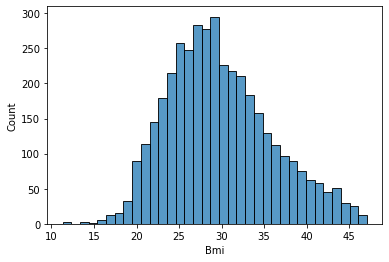

In [49]:
sns.histplot(data=cleaned_data_try_2, x="Bmi") #Se grafica un histograma que representa la distribución de la variable Bmi con
#los valores atípicos como nulos

##### Al reemplazar los valores atípicos como nulos, ahora se tiene aproximadamente un 7% de observaciones con valores nulos en la variable Bmi

In [50]:
round(cleaned_data_try_2["Bmi"].isnull().sum()/len(cleaned_data_try_2["Bmi"]) * 100, 3)

6.914

#### Analisis de las métricas de el nuevo dataframe al transformar los valores atípicos del bmi a NaN

In [51]:
cleaned_data_try_2["Bmi"].describe()

count    3958.000000
mean       29.770793
std         6.090114
min        11.300000
25%        25.300000
50%        29.000000
75%        33.500000
max        47.100000
Name: Bmi, dtype: float64

#### Alternativa extra: Reemplazar valores nulos por la media

In [52]:
cleaned_data_try_extra = cleaned_data_try_2.copy()  #Se hace una copia del dataframe clenaned_data_try_2 
                                                    #en el que se transformo los valores atípicos del bmi a NaN
cleaned_data_try_extra['Bmi'].fillna(cleaned_data_try_extra['Bmi'].mean(),inplace=True) #Se remplazan los valores nulos 
                                                                                        # por la media de los valores del bmi
cleaned_data_try_extra

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67,1
1,0,0,Yes,Self-employed,Rural,202.21,29.770793,never smoked,Female,61,1
2,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80,1
3,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Female,49,1
4,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,29.770793,never smoked,Female,80,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.000000,never smoked,Female,81,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Female,35,0
5108,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Male,51,0


#### Distribución de la variable bmi al reemplazar valores nulos por la media

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

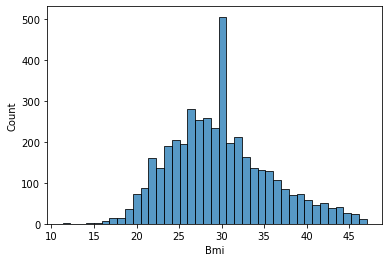

In [53]:
sns.histplot(data=cleaned_data_try_extra, x="Bmi")

In [54]:
cleaned_data_try_extra['Bmi'].median() # Se ve la media de los valores de bmi que no son nulos

29.6

- Vemos que tampoco es una buena alternativa, ya que al reemplazar los valores nulos por la media de los valores del bmi, la distribución de la variable se ve afectada porque se puede ver que la cantidad de observaciones que pertenencen a la media aumentó considerablemente, que corresponde al valor de bmi de 29.6 aproximadamente

##### ¿Qué sucede si se eliminan los valores nulos?

In [55]:
cleaned_data_try_3 = cleaned_data_try_2.copy()  #Se hace una copia del dataframe clenaned_data_try_2 en donde se transformó a los 
                                                #valores atípicos a nulos/en blanco
cleaned_data_try_3=cleaned_data_try_3.dropna(subset=['Bmi'])  #con .dropna se eliminan las observaciones que tienen valores nulos en Bmi

In [56]:
cleaned_data_try_3 #Se imprime el nuevo dataframe sin valores atípicos y eliminado valores nulos

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1
5,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Male,81,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,0,0,No,Private,Urban,82.85,46.9,Unknown,Female,18,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,0


- Queda un total de 3958 observaciones

- Se pasó de 4252 observaciones del dataframe cleaned_data a 3958 observaciones sin valores atípicos y eliminado valores nulos

#### Analisis de las métricas de el nuevo dataframe sin valores atípicos y eliminado valores nulos

In [57]:
cleaned_data_try_3["Bmi"].describe()

count    3958.000000
mean       29.770793
std         6.090114
min        11.300000
25%        25.300000
50%        29.000000
75%        33.500000
max        47.100000
Name: Bmi, dtype: float64

#### Se analiza la nueva distribución de la variable bmi sin valores atípicos y eliminado valores nulos

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

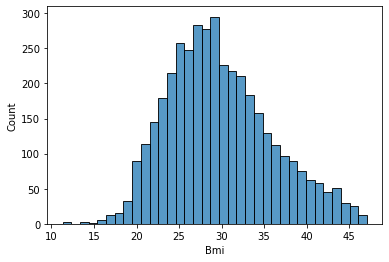

In [58]:
sns.histplot(data=cleaned_data_try_3, x="Bmi")

Sin embargo, al eliminar estas observaciones, se puede estar perdiendo información del resto de variables, se puede  tratar de outliers naturales, y si los eliminamos reduciría el tamaño del conjunto de datos y limitará la aplicabilidad de nuestro modelo al rango de medidas incluidas

#### Matriz de valores nulos

In [59]:
!pip install missingno
#conda install -c "conda-forge/label/gcc7" missingno
#Comando para poder importar el modulo missingno, para obtener una gráfica de los valores nulos en cada una de la variables predictivas

<AxesSubplot:>

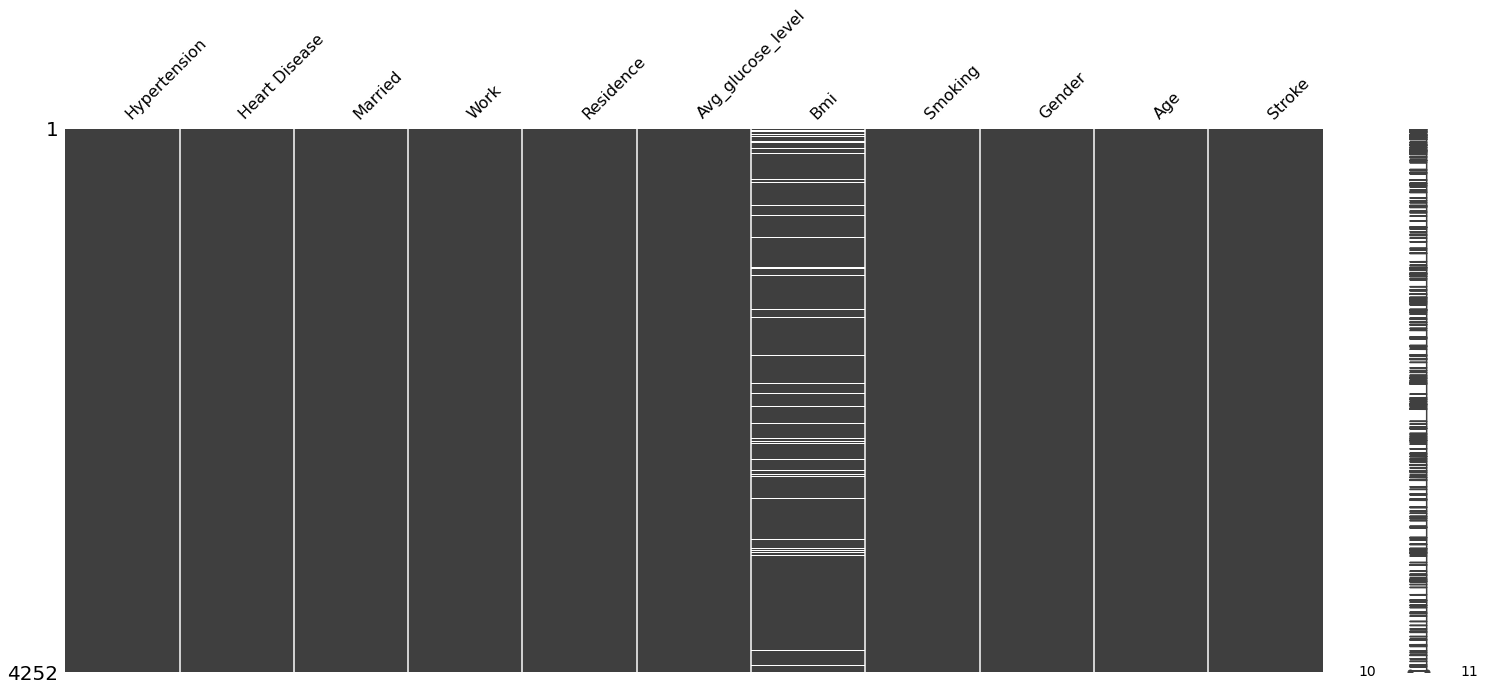

In [60]:
import missingno as msno     #Importación del modulo missingno
msno.matrix(cleaned_data_try_2)  # Creación de gráfica de los valores nulos en cada una de la variables predictivas

A pesar de que los valores mayores a 47.275 son considerados outliers, se va a decidir mantenerlos ya que es posible aunque muy poco común que una persona tenga un bmi superior a 50. Existen casos en que han podido llegar a tener un bmi de 90 (Brown, 2022). Además, se puede observar que al mantener o eliminar estos valores, la media y la desviación estándar casi no cambian, como se observa a continuación:  

In [61]:
#Manteniendo los outliers
cleaned_data["Bmi"].describe()

count    4071.000000
mean       30.428691
std         7.234598
min        11.300000
25%        25.400000
50%        29.200000
75%        34.150000
max        92.000000
Name: Bmi, dtype: float64

In [62]:
#Sin mantener los outliers
cleaned_data_try_3["Bmi"].describe()

count    3958.000000
mean       29.770793
std         6.090114
min        11.300000
25%        25.300000
50%        29.000000
75%        33.500000
max        47.100000
Name: Bmi, dtype: float64

#### Referencias
#### Nuba, Y. (1965) “Error in Missingno module import in Jupyter Notebook,” Stack Overflow. Available from: https://stackoverflow.com/questions/52235421/error-in-missingno-module-import-in-jupyter-notebook
#### Brown, L. (2022) “Can you have a BMI of 90?,” Critical Body, Critical Body Available from: https://criticalbody.com/bmi-90/ 

## Decisión

 No se va a eliminar los outliers, pero si los valores nulos propios de la base de datos ya que se considerarán solo observaciones completas

#### Porcentaje de valores nulos propios de la base de datos, manteniendo los outliers

- Así, ahora se tiene aproximadamente un 4.25% de observaciones con valores nulos en la variable Bmi, los cuales se van a ignorar

In [63]:
round(cleaned_data["Bmi"].isnull().sum()/len(cleaned_data["Bmi"]) * 100, 3)

4.257

##### Manejar valores atípicos para las variables work y gender

In [64]:
cleaned_data_4 = cleaned_data.copy()   #Se hace una copia del dataframe clenaned_data que no tiene los 2 valores
                                       #extremos del bmi de 40,000
#Se crea un dataframe que contenga solo las observaciones que corresponden a una de las categorías existentes de work
cleaned_data_4 = cleaned_data_4[cleaned_data_4["Work"].isin(["Private", "Self-employed","Govt_job", "children","Never_worked"])]
cleaned_data_4["Work"].value_counts() # hacemos recuentos de valores únicos de la variable work para asegurarnos que se hayan
                                      # eliminado las observaciones que corresponden a cateogorías inexistentes

Private          2783
Self-employed     806
Govt_job          651
Never_worked        5
Name: Work, dtype: int64

- Podemos ver que efectivamente no se consideraron las 7 observaciones que pertenecen a 4 categorías de trabajo que no existen: sdfsdf, dsfsdf, k–sdh-k y sdsd-i.
- Y aunque la categoría Never_worked tiene muy pocas observaciones, 5 en total, se considera de interés para el estudio, por lo cual se mantienen estas observaciones 

In [65]:
cleaned_data_5 = cleaned_data_4.copy() #Se hace una copia del dataframe clenaned_data_4 que no tiene los 2 valores
                                       #extremos del bmi de 40,000, ni las observaciones con categorías inexistentes de work
#A continuación se consideran solo las observaciones que corresponden a las categorías "male" y "female" de gender
cleaned_data_5 = cleaned_data_5[cleaned_data_5["Gender"].isin(["Male", "Female"])] 
cleaned_data_5["Gender"].value_counts() #hacemos recuentos de valores únicos de la variable gender para asegurarnos que se haya
                                        #eliminado la única observación que pertenecía a la categoría other

Female    2567
Male      1677
Name: Gender, dtype: int64

In [66]:
def married_to_binary(married):  #Se crea una función que recibe como argumento los valores de la variable married
    if married == "Yes":         #Remplaza los valores "Yes" por 1 y "No" por 0
        return 1
    else:
        return 0

In [67]:
cleaned_data_6 = cleaned_data_5.copy()  #Se hace una copia del dataframe clenaned_data_5 que no tiene los 2 valores
                                       #extremos del bmi de 40,000, ni las observaciones con categorías inexistentes de work, ni
                                       #la única observación con categoría other en gender 
cleaned_data_6["Married"] = cleaned_data_6["Married"].apply(married_to_binary) #Aplica la función married_to_binary a los 
                                                                               #valores de la variable married  
cleaned_data_6

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
1,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,Female,61,1
2,0,1,1,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,1,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,0,0,0,Private,Urban,82.85,46.9,Unknown,Female,18,0
5105,1,0,1,Private,Urban,83.75,NaN,never smoked,Female,80,0
5107,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,Female,35,0
5108,0,0,1,Private,Rural,166.29,25.6,formerly smoked,Male,51,0


In [68]:
cleaned_data_final = cleaned_data_6.copy() #Finalmente, se crea una copia del dataset con todos los cambios aplicados anteriormente
cleaned_data_final = cleaned_data_final.dropna(subset=['Bmi']) #Se eliminan las observaciones con valores nulos de bmi 
cleaned_data_final

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
2,0,1,1,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,1,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1
5,0,0,1,Private,Urban,186.21,29.0,formerly smoked,Male,81,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,0,1,Private,Rural,77.93,21.7,never smoked,Female,57,0
5103,0,0,0,Private,Urban,82.85,46.9,Unknown,Female,18,0
5107,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,Female,35,0
5108,0,0,1,Private,Rural,166.29,25.6,formerly smoked,Male,51,0


- Después del preprocesamiento y limpieza de la base de datos, nos quedamos con 4064 observaciones en total

### 1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta?

 #### Correlación entre las variables numéricas

In [69]:
corr = cleaned_data_final.corr()   #Se analiza la correlación entre las variables numéricas de la base de datos limpia, usando
                                   #el coeficiente de correlación estándar de pearson como el predeterminado
corr

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke
Hypertension,1.000000,0.104264,0.095222,0.174407,0.119289,0.248035,0.132554
Heart Disease,0.104264,1.000000,0.061963,0.148154,-0.003783,0.262629,0.126632
Married,0.095222,0.061963,1.000000,0.106328,0.109198,0.448760,0.060427
Avg_glucose_level,0.174407,0.148154,0.106328,1.000000,0.157381,0.225423,0.132709
Bmi,0.119289,-0.003783,0.109198,0.157381,1.000000,0.031250,0.001315
Age,0.248035,0.262629,0.448760,0.225423,0.031250,1.000000,0.234656
Stroke,0.132554,0.126632,0.060427,0.132709,0.001315,0.234656,1.000000


<AxesSubplot:>

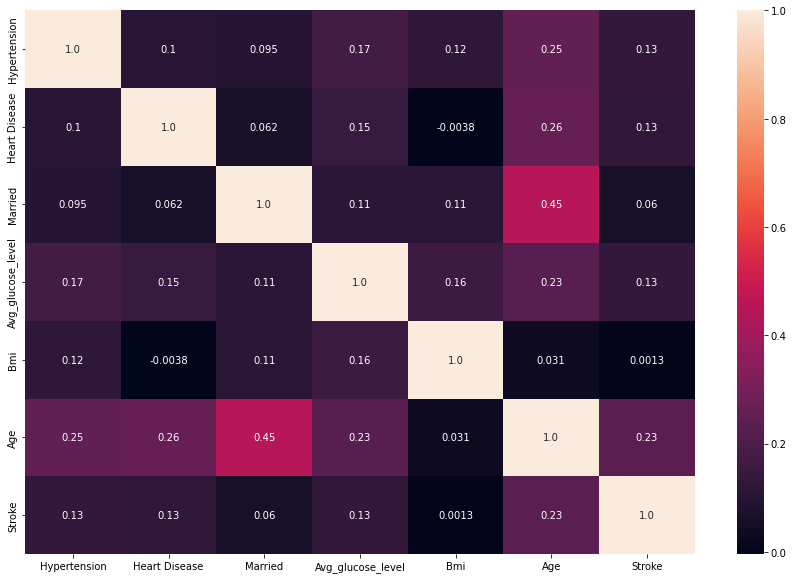

In [70]:
import seaborn as sns          #Se importan las librerías necesarias de seaborn y matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))   #Se establece el tamaño del mapa de calor que se graficará a continuación
sns.heatmap(cleaned_data_final.corr(),annot=True,fmt='.2')  #se usa la función de mapa de calor en seaborn para trazar
                                                            #la correlación entre variables

 #### Correlación entre todas las variables (incluyendo categóricas y numéricas)

In [71]:
from sklearn.preprocessing import LabelEncoder #Se importa del paquete sklearn.preprocessing a LabelEncoder, que 
              #codifica etiquetas de una variable categórica en valores numéricos entre 0 y el número de clases menos 1.
cols=cleaned_data_final.select_dtypes(include=['object']).columns
print(cols)
#El código anterior obtendrá columnas cuyo tipo de datos es objeto.
le=LabelEncoder()
# Se inicializa el objeto Label Encoder 
cleaned_data_final_corr = cleaned_data_final.copy() # Se crea una copia de la base de datos limpia: cleaned_data_final para
                                                    #trabajar sobre ella    
cleaned_data_final_corr[cols]=cleaned_data_final_corr[cols].apply(le.fit_transform)
# Se transforman los datos categóricos en numéricos
print(cleaned_data_final_corr.head(10))  #Se imprime el nuevo dataframe con los cambios de variables categóricas en numéricas

Index(['Work', 'Residence', 'Smoking', 'Gender'], dtype='object')
    Hypertension  Heart Disease  Married  Work  Residence  Avg_glucose_level  \
0              0              1        1     2          1             228.69   
2              0              1        1     2          0             105.92   
3              0              0        1     2          1             171.23   
4              1              0        1     3          0             174.12   
5              0              0        1     2          1             186.21   
6              1              1        1     2          0              70.09   
7              0              0        0     2          1              94.39   
9              0              0        1     2          1              58.57   
10             1              0        1     2          0              80.43   
11             0              1        1     0          0             120.46   

     Bmi  Smoking  Gender  Age  Stroke  
0   36.6    

<AxesSubplot:>

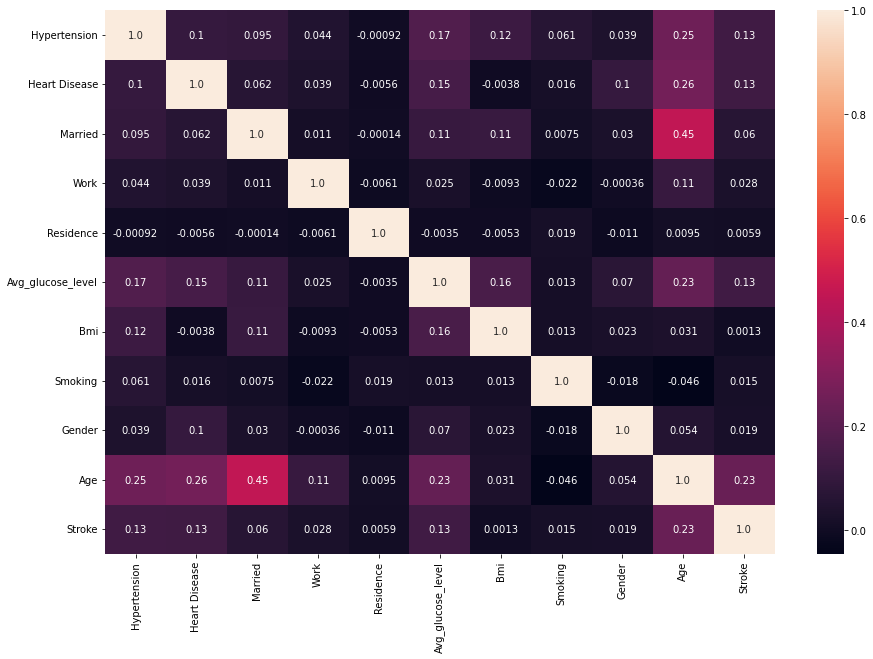

In [72]:
plt.figure(figsize=(15,10)) #Se establece el tamaño del mapa de calor que se graficará a continuación
sns.heatmap(cleaned_data_final_corr.corr(),annot=True,fmt='.2')  #se usa la función de mapa de calor en seaborn para trazar
                                                            #la correlación entre todas las variables
#está utilizando por default la correlación de pearson 

Las variables que parecen estar correlacionadas con la variable de respuesta son la variable age (con 0.23), la variable avg_glucose_level con (0.13), la variable heart disease y la variable hypertension con (0.13)

Donde, una correlación de 0.01 a 0.19 indica una correlación positiva muy baja, de 0.2 a 0.39 indica una correlación positiva baja, y de 0.4 a 0.69 una correlación positiva moderada

- Entre variables predictivas, podemos ver que age con married tienen la correlación más grande de 0.45
- Por otra parte age también se ve correlacionada con hypertension, heart disease, avg_glucose_level con una correlación positiva baja
- Además bmi se ve correlacionado con married, hypertension y avg_glucose_level con una correlación positiva muy baja
- avg_glucose_level también está correlacionada con hypertension y heart disease con una correlación positiva muy baja

#### Referencias
Andrade, A. (2018). “Correlation heatmap”. Stack Overflow. Recuperado de: https://stackoverflow.com/questions/39409866/correlation-heatmap 

Sentence. (2019). “What is the default value of Pandas Corr()”. Stack Overflow. Recuperado de: https://stackoverflow.com/questions/55717296/what-is-the-default-value-of-pandas-corr. 

### 1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución. Analice la distribución de la variable respuesta.

#### Distribución de las variables cuantitativas predictivas

<AxesSubplot:xlabel='Age', ylabel='Count'>

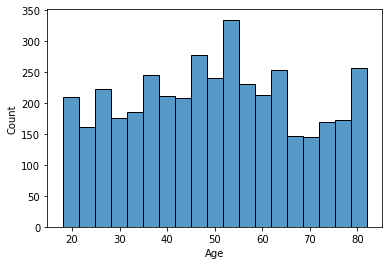

In [73]:
sns.histplot(data=cleaned_data_final, x="Age") #La función sns.histplot grafica un histograma que representa la 
                                               #distribución de la variable Age en base a la base de datos limpia

<AxesSubplot:xlabel='Bmi', ylabel='Count'>

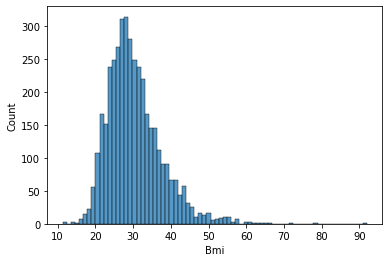

In [74]:
sns.histplot(data=cleaned_data_final, x="Bmi") #La función sns.histplot grafica un histograma que representa la 
                                               #distribución de la variable Bmi en base a la base de datos limpia

<AxesSubplot:xlabel='Avg_glucose_level', ylabel='Count'>

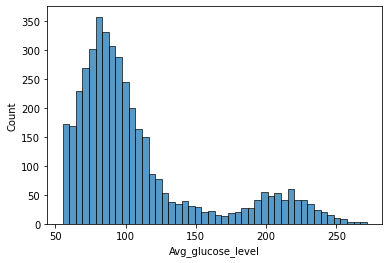

In [75]:
sns.histplot(data=cleaned_data, x="Avg_glucose_level") #La función sns.histplot grafica un histograma que representa la 
                                               #distribución de la variable Avg_glucose_level en base a la base de datos limpia

#### Distribución de las variables categóricas binarias predictivas junto a la variable respuesta

In [76]:
group = cleaned_data_final.groupby(["Hypertension", "Stroke"]).agg( #Se crea un dataframe que agrupa la variable binaria predictiva
                                                        #Hypertension y la variable de respuesta Stroke agregando el recuento
                                                        #de las posibles combinaciones de las categorías de estas variables
    count=("Stroke", "count")
).reset_index()
group

,Hypertension,Stroke,count
0,0,0,3468
1,0,1,147
2,1,0,389
3,1,1,60


<AxesSubplot:xlabel='Hypertension', ylabel='count'>

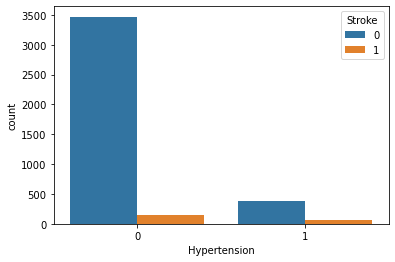

In [77]:
#El anterior código de almacena en la variable group, la cual se utiliza como los datos para hacer un gráfico de barras,
#que representa a las categorías de la variable hypertension en el eje x, su recuento en el eje y, y cuántas de esas
#observaciones pertenecen a pacientes que han o no sufrido de un stroke mediante una leyenda de colores                                                                                
group = cleaned_data_final.groupby(["Hypertension", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Hypertension", y="count", hue="Stroke", data=group)  

In [78]:
#Para el resto de variables binarias predictivas se utiliza el mismo código

In [79]:
group = cleaned_data_final.groupby(["Heart Disease", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Heart Disease,Stroke,count
0,0,0,3655
1,0,1,168
2,1,0,202
3,1,1,39


<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

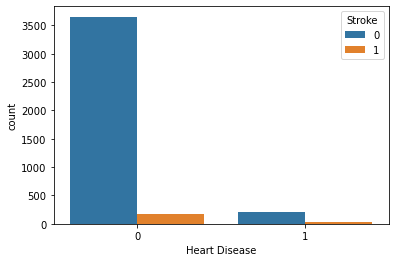

In [80]:
group = cleaned_data_final.groupby(["Heart Disease", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Heart Disease", y="count", hue="Stroke", data=group)

In [81]:
group = cleaned_data_final.groupby(["Married", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Married,Stroke,count
0,0,0,844
1,0,1,22
2,1,0,3013
3,1,1,185


<AxesSubplot:xlabel='Married', ylabel='count'>

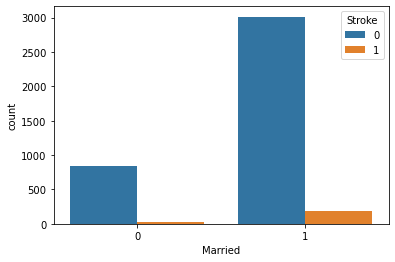

In [82]:
group =  cleaned_data_final.groupby(["Married", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Married", y="count", hue="Stroke", data=group)

#### Distribución de las variables categóricas predictivas junto a la variable respuesta

In [83]:
#Se crea un dataframe que agrupa la variable categórica predictiva
#work y la variable de respuesta Stroke agregando el recuento
#de las posibles combinaciones de las categorías de estas variables
group = cleaned_data_final.groupby(["Work", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Work,Stroke,count
0,Govt_job,0,596
1,Govt_job,1,28
2,Never_worked,0,5
3,Private,0,2547
4,Private,1,126
5,Self-employed,0,709
6,Self-employed,1,53


<AxesSubplot:xlabel='Work', ylabel='count'>

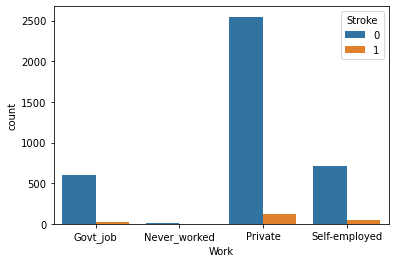

In [84]:
#El anterior código de almacena en la variable group, la cual se utiliza como los datos para hacer un gráfico de barras,
#que representa a las categorías de la variable work en el eje x, su recuento en el eje y, y cuántas de esas
#observaciones pertenecen a pacientes que han o no sufrido de un stroke mediante una leyenda de colores     
group = cleaned_data_final.groupby(["Work", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Work", y="count", hue="Stroke", data=group)

In [85]:
#Para el resto de variables categoricas predictivas se utiliza el mismo código

In [86]:
group = cleaned_data_final.groupby(["Residence", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Residence,Stroke,count
0,Rural,0,1896
1,Rural,1,99
2,Urban,0,1961
3,Urban,1,108


<AxesSubplot:xlabel='Residence', ylabel='count'>

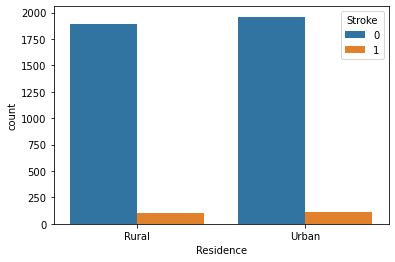

In [87]:
group = cleaned_data_final.groupby(["Residence", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Residence", y="count", hue="Stroke", data=group)

In [88]:
group = cleaned_data_final.groupby(["Smoking", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Smoking,Stroke,count
0,Unknown,0,789
1,Unknown,1,28
2,formerly smoked,0,755
3,formerly smoked,1,57
4,never smoked,0,1626
5,never smoked,1,83
6,smokes,0,687
7,smokes,1,39


<AxesSubplot:xlabel='Smoking', ylabel='count'>

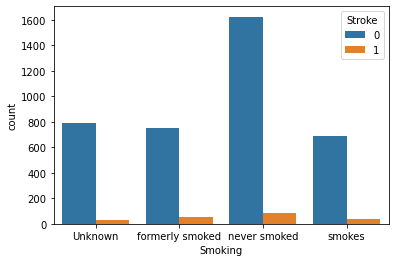

In [89]:
group = cleaned_data_final.groupby(["Smoking", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Smoking", y="count", hue="Stroke", data=group)

In [90]:
group = cleaned_data_final.groupby(["Gender", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group

,Gender,Stroke,count
0,Female,0,2362
1,Female,1,118
2,Male,0,1495
3,Male,1,89


<AxesSubplot:xlabel='Gender', ylabel='count'>

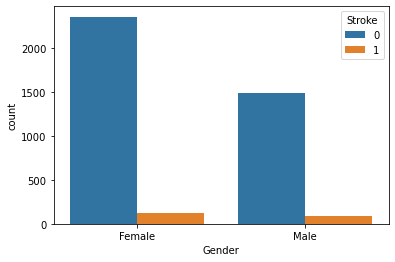

In [91]:
group = cleaned_data_final.groupby(["Gender", "Stroke"]).agg(
    count=("Stroke", "count")
).reset_index()
group
sns.barplot(x="Gender", y="count", hue="Stroke", data=group)

#### Gráficos de dispersión de un solo eje para las variables predictivas cuantitativas y la variable respuesta

<AxesSubplot:xlabel='Stroke', ylabel='Bmi'>

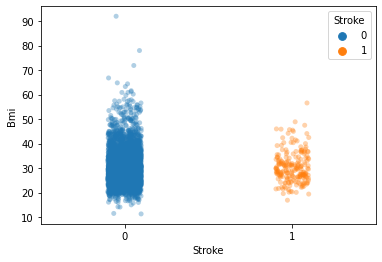

In [92]:
#Se hace un gráfico de dispersión de un solo eje que se utiliza para visualizar la distribución de los valores de las
#variables bmi y stroke
sns.stripplot(data=cleaned_data_final, x="Stroke", y="Bmi", hue="Stroke",alpha=0.35) 


In [93]:
#Para el resto de variables predictivas cuantitativas se utiliza el mismo código

<AxesSubplot:xlabel='Stroke', ylabel='Avg_glucose_level'>

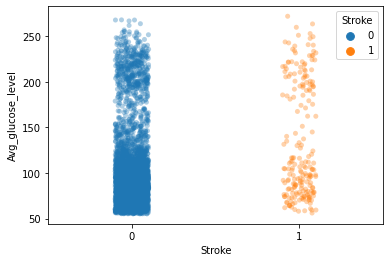

In [94]:
sns.stripplot(data=cleaned_data_final, x="Stroke", y="Avg_glucose_level", hue="Stroke",alpha=0.35)

<AxesSubplot:xlabel='Stroke', ylabel='Age'>

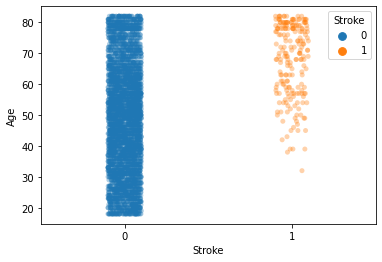

In [95]:
sns.stripplot(data=cleaned_data_final, x="Stroke", y="Age", hue="Stroke",alpha=0.35)

- Se puede observar es más común sufrir strokes para la personas pasados los 50 años, con un grupo de datos concentrados entre aproximadamente los 75 y 82 años

#### Distribución de la variable de respuesta

In [96]:
cleaned_data_final['Stroke'].value_counts()

0    3857
1     207
Name: Stroke, dtype: int64

<AxesSubplot:xlabel='Stroke', ylabel='count'>

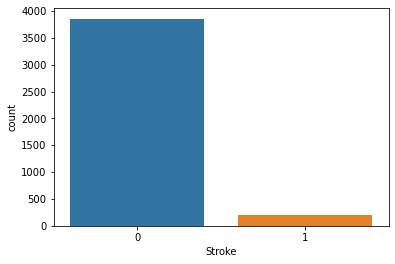

In [97]:
sns.countplot(data=cleaned_data_final,x='Stroke')

#### Referencias
#### Seaborn. (2016). “Seaborn.histplot". Seaborn.Recuperado de: https://seaborn.pydata.org/generated/seaborn.histplot.html 
#### Bhadaniya, S. (2022). “Pandas groupby count using size() and count() method”. FavTutor. Recuperado de: https://favtutor.com/blogs/pandas-groupby-count (Accessed 7 April 2023). 

#  División de la base de datos en sets

### 3. Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set.

- Primero necesitamos transformar las variables categóricas a dummies

In [98]:
display(cleaned_data_final.dtypes)

Hypertension           int64
Heart Disease          int64
Married                int64
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                    int32
Stroke                 int64
dtype: object

- Las variable Work, Residence, Smoking, Gender son variables categóricas, pero en el dataset son tipo object, por lo tanto necesitamos cambiar sus tipos a category:

In [99]:
cleaned_data_final.Work = cleaned_data_final.Work.astype('category') #Convertimos de variable tipo objeto a variable categórica 
print(cleaned_data_final.Work.cat.categories)  # Consultamos cúales con los valores (categorías) que puede tomar esta variable 
print(cleaned_data_final.Work.dtype) # Comprobamos que el cambio del tipo de dato se efectuó correctamente

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed'], dtype='object')
category


In [100]:
cleaned_data_final.Residence = cleaned_data_final.Residence.astype('category') #Convertimos de variable tipo objeto a variable categórica 
print(cleaned_data_final.Residence.cat.categories)  # Consultamos cúales con los valores (categorías) que puede tomar esta variable 
print(cleaned_data_final.Residence.dtype) # Comprobamos que el cambio del tipo de dato se efectuó correctamente

Index(['Rural', 'Urban'], dtype='object')
category


In [101]:
cleaned_data_final.Smoking = cleaned_data_final.Smoking.astype('category') #Convertimos de variable tipo objeto a variable categórica 
print(cleaned_data_final.Smoking.cat.categories)  # Consultamos cúales con los valores (categorías) que puede tomar esta variable 
print(cleaned_data_final.Smoking.dtype) # Comprobamos que el cambio del tipo de dato se efectuó correctamente

Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')
category


In [102]:
cleaned_data_final.Gender = cleaned_data_final.Gender.astype('category') #Convertimos de variable tipo objeto a variable categórica 
print(cleaned_data_final.Gender.cat.categories)  # Consultamos cúales con los valores (categorías) que puede tomar esta variable 
print(cleaned_data_final.Gender.dtype) # Comprobamos que el cambio del tipo de dato se efectuó correctamente

Index(['Female', 'Male'], dtype='object')
category


In [103]:
display(cleaned_data_final.dtypes)

Hypertension            int64
Heart Disease           int64
Married                 int64
Work                 category
Residence            category
Avg_glucose_level     float64
Bmi                   float64
Smoking              category
Gender               category
Age                     int32
Stroke                  int64
dtype: object

In [104]:
#Transformación de variables categóricas a variables dummies:
#Nuevo dataframe cleaned_data_final_new al cuál le vamos a asignar los datos con variables categóricas
#Usamos función pd.get_dummies
#data: estructura de datos de donde se va a obtener las variables dummies 
#columns: nombres de las columnas que van a ser transformadas
#dropfirst: Obtener k-1 dummies de k niveles categóricos eliminando el primer nivel, para las variables categóricas
cleaned_data_final_new = pd.get_dummies(data = cleaned_data_final, columns = ['Work','Residence','Smoking','Gender'], drop_first= True) 
cleaned_data_final_new.columns #Se imprimen las columnas del nuevo dataframe para verificar la creación de las variables dummies 

Index(['Hypertension', 'Heart Disease', 'Married', 'Avg_glucose_level', 'Bmi',
       'Age', 'Stroke', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Gender_Male'],
      dtype='object')

In [105]:
cleaned_data_final_new.head()  #Observamos como quedó el nuevo dataframe mostrando los primeros 5 registros

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,Work_Never_worked,Work_Private,Work_Self-employed,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male
0,0,1,1,228.69,36.6,67,1,0,1,0,1,1,0,0,1
2,0,1,1,105.92,32.5,80,1,0,1,0,0,0,1,0,1
3,0,0,1,171.23,34.4,49,1,0,1,0,1,0,0,1,0
4,1,0,1,174.12,24.0,79,1,0,0,1,0,0,1,0,0
5,0,0,1,186.21,29.0,81,1,0,1,0,1,1,0,0,1


In [106]:
#Importamos las librerías necesarias
from sklearn.model_selection import train_test_split  # sklearn(módulo para machine learning)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
predictors = ['Hypertension','Heart Disease','Married','Avg_glucose_level','Bmi','Age','Work_Never_worked','Work_Private','Work_Self-employed','Residence_Urban','Smoking_formerly smoked','Smoking_never smoked','Smoking_smokes','Gender_Male']
outcome = 'Stroke'
data_x = cleaned_data_final_new[predictors] 
data_y = cleaned_data_final_new[outcome]

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=1 - train_ratio, random_state=1, stratify=data_y)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=1, stratify=y_test) 

print(x_train, x_val, x_test)

      Hypertension  Heart Disease  Married  Avg_glucose_level   Bmi  Age  \
889              0              1        1              56.31  24.3   62   
338              0              0        1              91.61  25.2   54   
2462             0              0        0             266.59  25.5   60   
3021             0              0        1             103.21  22.9   79   
1974             1              0        1              60.99  32.8   45   
...            ...            ...      ...                ...   ...  ...   
3047             0              0        0              62.52  38.2   22   
4179             0              0        1              73.24  34.9   61   
2634             0              0        0              86.70  24.6   23   
2218             0              0        1              97.39  38.0   57   
205              0              0        1             106.74  33.0   78   

      Work_Never_worked  Work_Private  Work_Self-employed  Residence_Urban  \
889      

In [107]:
print(y_train, y_val, y_test)

889     0
338     0
2462    0
3021    0
1974    0
       ..
3047    0
4179    0
2634    0
2218    0
205     1
Name: Stroke, Length: 3251, dtype: int64 4355    0
2081    0
628     0
3769    0
529     0
       ..
2668    0
3966    0
4719    0
1937    0
4313    0
Name: Stroke, Length: 406, dtype: int64 5       1
188     1
4720    0
1038    0
5021    0
       ..
3568    0
4804    0
3480    0
20      1
3065    0
Name: Stroke, Length: 407, dtype: int64


#### Referencias
#### HendrikHendrik. (2018). “Train/Test/validation set splitting in Sklearn”. Data Science Stack Exchange. Recuperado de: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn


#### Forma adicional de haber hecho la división sin haber dividido en set de predictores y de variable de respuesta

In [108]:
#Importamos las librerías necesarias
from sklearn.model_selection import train_test_split  # sklearn(módulo para machine learning)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#Se divide al set de datos en 3 sets: Entrenamiento (80%), Validación (10%), y Prueba (10%).
#train_test_split: hace una división de un conjunto de datos en dos bloques: de entrenamiento y prueba de un modelo (train and test).
#El primer argumento es el dataframe del cual se va a escoger el arreglo de datos a dividir
#test size indica la proporción del conjunto de datos que se incluirá en la segunda división
#random_state: controla la aleatorización aplicada a los datos antes de la división, se fija a un valor entero para obtener 
# las mismas divisiones cuando volvamos a correr el código. 
trainData, temp = train_test_split(cleaned_data_final_new, test_size=0.2, random_state=1) #el test size en este caso corresponde a la 
                                                                                   #proporción del conjunto de datos total para el 
                                                                                   #bloque de validación más el de prueba (0.1+0.1=0.2)
                                                                                      
                                                                                   #temp es el bloque que tiene el conjunto de datos para el 
                                                                                   #bloque de validación más el de prueba

validData, testData = train_test_split(temp, test_size=0.5, random_state=1)        #el test size para el bloque de prueba de 0.5 es la proporción 
                                                                                   #del conjunto de datos del bloque temp (0.1 del conjunto de datos total)

print('Training   : ', trainData.shape)  #Se imprime el número de filas y columnas para el subconjunto de datos Training
print('Validation : ', validData.shape)  #Se imprime el número de filas y columnas para el subconjunto de datos Validation
print('Test       : ', testData.shape)   #Se imprime el número de filas y columnas para el subconjunto de datos Test

Training   :  (3251, 15)
Validation :  (406, 15)
Test       :  (407, 15)


### Razón por la que aplicamos método stratify

- Debido a que en una base de datos desbalanceada pueden presentarse problemas de clasificación debido a un desequilibrio en la distribución de las clases de la variable de respuesta, se utiliza la división estratificada para garantizar que las frecuencias de clases de la variable de respuesta se conserven aproximadamente en cada división de entrenamiento, validación y prueba.

In [109]:
cleaned_data_final['Stroke'].value_counts()

0    3857
1     207
Name: Stroke, dtype: int64

In [110]:
207/3857

0.053668654394607204

- 0.053 es la proporción de observaciones de pacientes con stroke con respecto a los que no han tenido un stroke en la base de datos limpia

In [111]:
y_train.value_counts()

0    3085
1     166
Name: Stroke, dtype: int64

In [112]:
166/3085

0.05380875202593193

- 0.053 es la proporción de observaciones de pacientes con stroke con respecto a los que no han tenido un stroke en el set de entrenamiento

y_val.value_counts()

In [113]:
20/386

0.05181347150259067

- 0.052 es la proporción de observaciones de pacientes con stroke con respecto a los que no han tenido un stroke en el set de validación

In [114]:
y_test.value_counts()

0    386
1     21
Name: Stroke, dtype: int64

In [115]:
21/386

0.054404145077720206

- 0.054 es la proporción de observaciones de pacientes con stroke con respecto a los que no han tenido un stroke en el set de prueba 

- Vemos que el método estratificado garantiza que cada división de conjuntos de datos tenga al menos aproximadamente la misma proporción de observaciones con una etiqueta dada que en el conjunto de datos original y completo

#### Referencias


#### Pytorch. (2023). “Split imbalanced dataset using Sklearn Stratified train_test_split().” Knowledge Transfer,  Recuperado de: https://androidkt.com/split-imbalanced-dataset-using-sklearn-stratified-train_test_split/

#  Técnica estadística para probar cuál de las dos técnicas mejora la predicción

### 4. Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto anterior mejora la predicción

- En primero se aplicará las 2 técnicas que investigamos que son utilizadas durante el entrenamiento del algoritmo para reducir el efecto negativo de una base de datos no balanceada.

#### Random Oversampling

In [116]:
#Instalamos imbalanced-Learn para poder trabajar con su librería
!pip install imbalanced-Learn

In [117]:
#Importamos la librería necesaria
from imblearn.over_sampling import RandomOverSampler

#Se define la estrategia de sobremuestreo y se le asigna la función de RandomOverSampler a la variable oversample.
oversample = RandomOverSampler(sampling_strategy='minority')
#Se realiza un ajuste con los valores de entrenamiento que teníamos
x_over, y_over = oversample.fit_resample(x_train,y_train)
#Observamos la muestra balanceada (positivo y negativo) 
print(y_over.value_counts())

0    3085
1    3085
Name: Stroke, dtype: int64


- Se tiene una muestra balanceada de positivo y negativo de clases, siendo equilibrada porque es 50/50.

#### SMOTE 

In [118]:
#Importamos la librería necesaria
from imblearn.over_sampling import SMOTE

#Se le asigna a la variable sm la función de SMOTE aleatorio
sm = SMOTE(random_state = 42)
#Se realiza un ajuste con los valores de entrenamiento que teníamos
x_sm, y_sm = sm.fit_resample(x_train,y_train)
#Observamos la muestra balanceada (positivo y negativo) 
print(y_sm.value_counts())

0    3085
1    3085
Name: Stroke, dtype: int64


- Se tiene una muestra balanceada de positivo y negativo de clases, siendo equilibrada porque es 50/50.

- Luego, se prueba estadísticamente cuál de las dos técnicas mejora la predicción:

Hipótesis Nula (Ho): Los promedios de los resultados del Random Oversampling y del SMOTE son iguales

Hipótesis Alternativa (H1): Los promedios de los resultados del Random Oversampling y del SMOTE no son iguales

#### Cross Validation

Para Random Oversampling

In [119]:
#Importamos las librerías necesaria
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Se le asigna a la variable modelo la función de DecisionTreeClassifier
modelo = DecisionTreeClassifier()
#Se indica cuántos fold (iteraciones) queremos
kfold_validacion = KFold(10)
#Se asigna los valores a evaluar y los datos necesarios para el cross validation
resultados1 = cross_val_score(modelo, x_over, y_over, cv = kfold_validacion)
#Se observa los resultados de los 10 folds
print(resultados1)
#Se observa el promedio de los resultados
resultados1.mean()  

[0.94813614 0.94975689 0.95461912 0.96110211 0.93517018 0.98379254
 1.         1.         1.         1.        ]


0.973257698541329

Para SMOTE

In [120]:
#Importamos las librerías necesaria
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Se le asigna a la variable modelo la función de DecisionTreeClassifier
modelo = DecisionTreeClassifier()
#Se indica cuántos fold (iteraciones) queremos
kfold_validacion = KFold(10)
#Se asigna los valores a evaluar y los datos necesarios para el cross validation
resultados2 = cross_val_score(modelo, x_sm, y_sm, cv = kfold_validacion)
#Se observa los resultados de los 10 folds
print(resultados2)
#Se observa el promedio de los resultados
resultados2.mean()  

[0.87034036 0.87682334 0.87520259 0.89951378 0.84440843 0.9286872
 0.93354943 0.96758509 0.93841167 0.96272285]


0.9097244732576986

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

from scipy import stats
t_stat, p_value = ttest_rel(resultados1, resultados2)

# Imprimir resultados
print("Modelo 1: Accuracy medio = {:.3f}, Desviación estándar = {:.3f}".format(np.mean(resultados1), np.std(resultados1)))
print("Modelo 2: Accuracy medio = {:.3f}, Desviación estándar = {:.3f}".format(np.mean(resultados2), np.std(resultados2)))
print("Resultado del t-test: Estadístico t = {:.3f}, Valor p = {:.3f}".format(t_stat, p_value))


Modelo 1: Accuracy medio = 0.973, Desviación estándar = 0.025
Modelo 2: Accuracy medio = 0.910, Desviación estándar = 0.040
Resultado del t-test: Estadístico t = 10.949, Valor p = 0.000


- Se observa que los resultados son buenos en ambos casos porque cada fold se acerca al 100%, pero el mejor resultado se encuentra en el promedio de los resultados de la técnica Random Oversampling, ya que es de 97.30%. Además, en cada fold de esa técnica se acercan bastante al 100% y cuatro de ellos resultó del 100%.
- En conclusión, se rechaza la hipótesis nula porque el valor p es menor a 0.05, de modo que se tiene suficiente evidencia estadística para decir que los promedios son diferentes, y la mejor técnica es la de Random Oversampling.

#### Referencias
#### A_mas. (2022). Cross-Validation en Python. Deepnote. https://deepnote.com/@a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f
#### Analytics with Adam. (2022). Handling Imbalanced Datasets in Python with Stratified Split, SMOTE and Random Oversampling [Video]. Youtube. https://www.youtube.com/watch?v=iCxtl44NMek&t=294s
#### Naren Castellon. (2021). Machine Learning desequilibrio de clases con Python y Smote [Video]. Youtube. https://www.youtube.com/watch?v=CpVVrak2YfI


### 5. Aplicación de 4 algoritmos utilizando la mejor estrategia de entrenamiento descubierta  y 6.1 Evaluación de cada modelo en el set de entrenamiento, validación y prueba 

### 5.1 Ensamble - RandomForestClassifier

In [136]:
#Se descarga las librerias necesarias
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from dmba import classificationSummary

In [137]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=2)
rf_model.fit(x_over, y_over)

RandomForestClassifier(n_estimators=500, random_state=2)

##### Evaluación del modelo de ensamble en el conjunto de entrenamiento

In [138]:
y_pred_train = rf_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3085
           1       1.00      1.00      1.00       166

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251



- "La precisión es la capacidad de un clasificador de no etiquetar una instancia positiva que en realidad es negativa. Para cada clase, se define como la relación entre los verdaderos positivos y la suma de un verdadero positivo y un falso positivo".

- "Recall o sensibilidad es la capacidad de un clasificador para encontrar todas las instancias positivas. Para cada clase se define como la razón de verdaderos positivos a la suma de verdaderos positivos y falsos negativos".

- "La puntuación F1 es una media armónica ponderada de precisión y sensibilidad tal que la mejor puntuación es 1,0 y la peor es 0,0. Los puntajes de F1 son más bajos que las medidas de precisión, ya que incorporan precisión y sensibilidad en su cálculo. Como regla general, se debe usar el promedio ponderado de F1 para comparar modelos de clasificación, no la precisión global".

- "El soporte es el número de ocurrencias reales de la clase en el conjunto de datos especificado".

- Acurracy o exactitud determina el porcentaje de veces que el modelo predice correctamente la clase.
(Kohli, 2019).

- Matriz de confusión

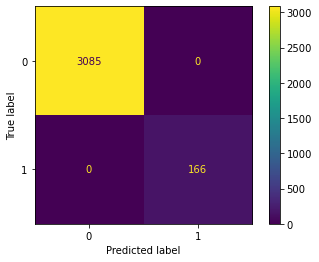

In [139]:
#Matriz de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [140]:
cm_train

array([[3085,    0],
       [   0,  166]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [141]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_train[1,1]
#Falsos negativos
FN = cm_train[1,0]
#Falsos negativos
FP = cm_train[0,1]
#Verdaderos negativos
TN = cm_train[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 1.0
La precisión es de: 1.0
La sensibilidad es de: 1.0
La especificidad es de: 1.0


In [142]:
print(TP)
print(FN)

166
0


- AUC y curva ROC

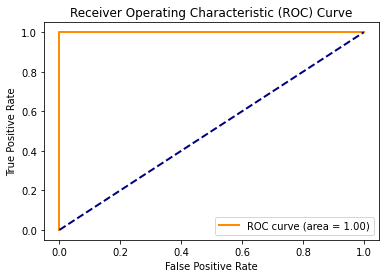

In [143]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, rf_model.predict_proba(x_train)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de ensamble en el conjunto de validación

In [144]:
y_pred_val = rf_model.predict(x_val)
print(classification_report(y_val, y_pred_val))
#precisión para la clase (0): 382/(382+20)
#precisión para la clase (1): 0/(0+4)

#recall para la clase (0): 382/(382+4)
#recall para la clase (1): 0/(0+20)

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#Accuracy = exactitud = La suma de verdaderos positivos y verdaderos negativos dividida por el número total de muestras

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       386
           1       0.00      0.00      0.00        20

    accuracy                           0.94       406
   macro avg       0.48      0.49      0.48       406
weighted avg       0.90      0.94      0.92       406



- Matriz de confusión

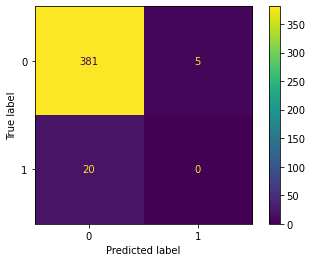

In [145]:
cm_val = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()
plt.show()

In [146]:
cm_val

array([[381,   5],
       [ 20,   0]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [147]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_val[1,1]
#Falsos negativos
FN = cm_val[1,0]
#Falsos negativos
FP = cm_val[0,1]
#Verdaderos negativos
TN = cm_val[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.9384236453201971
La precisión es de: 0.0
La sensibilidad es de: 0.0
La especificidad es de: 0.9870466321243523


- AUC y curva ROC

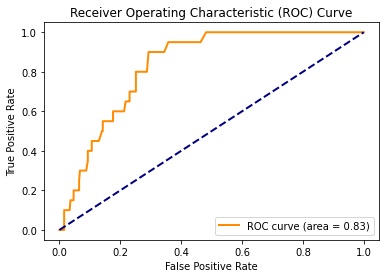

In [148]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, rf_model.predict_proba(x_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de ensamble en el conjunto de prueba

In [149]:
#Se puede observar que nuestro accuracy es de 0.95, es decir se obtuvo un 95% de predicciones correctas para pacientes que no 
#sufrieron de un stroke

In [150]:
y_pred_test = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       386
           1       0.00      0.00      0.00        21

    accuracy                           0.94       407
   macro avg       0.47      0.50      0.48       407
weighted avg       0.90      0.94      0.92       407



In [151]:
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_test)

0.941031941031941


- Matriz de confusión

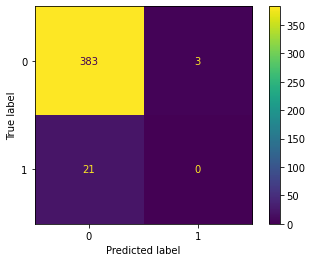

In [152]:
#Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [153]:
cm_test

array([[383,   3],
       [ 21,   0]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [154]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_test[1,1]
#Falsos negativos
FN = cm_test[1,0]
#Falsos negativos
FP = cm_test[0,1]
#Verdaderos negativos
TN = cm_test[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.941031941031941
La precisión es de: 0.0
La sensibilidad es de: 0.0
La especificidad es de: 0.9922279792746114


- AUC y curva ROC

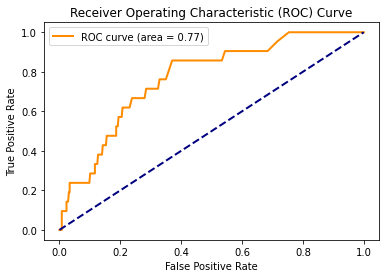

In [155]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### 5.2 Algoritmo no visto en clase - Gradient boost trees

In [156]:
#Gradient boost trees, es un metodo de ensamble que utliza un conjunto de árboles de decisión para predecir una etiqueta objetivo.  
#Con la diferencia que Gradient Boost tienen una profundidad superior a 1. 

#Dentro de nuestro df, se puede observar que el accuracy es de 0.94 el cual sigue siendo bastante bueno tomando en cuenta que dicho metodo
#Es popular para resolver problemas de predicción en los dominios de clasificación y regresión.  
#Tratando de simplicar el el objetivo y reducir el número de iteraciones para llegar a la solución mas óptima.
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=0)
gb_model.fit(x_over, y_over)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=0)

##### Evaluación del modelo Gradient boost trees en el conjunto de entrenamiento

In [157]:
y_pred_train = gb_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3085
           1       0.33      0.98      0.49       166

    accuracy                           0.90      3251
   macro avg       0.66      0.94      0.72      3251
weighted avg       0.96      0.90      0.92      3251



- Matriz de confusión

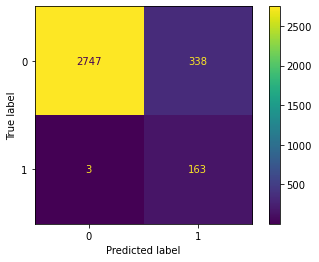

In [158]:
#Matriz de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [159]:
cm_train

array([[2747,  338],
       [   3,  163]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [160]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_train[1,1]
#Falsos negativos
FN = cm_train[1,0]
#Falsos negativos
FP = cm_train[0,1]
#Verdaderos negativos
TN = cm_train[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8951091971701015
La precisión es de: 0.3253493013972056
La sensibilidad es de: 0.9819277108433735
La especificidad es de: 0.8904376012965964


In [161]:
print(TP)
print(FN)

163
3


- AUC y curva ROC

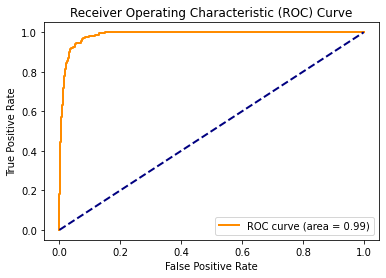

In [162]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, gb_model.predict_proba(x_train)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de Gradient boost trees en el conjunto de validación

In [163]:
y_pred_val = gb_model.predict(x_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       386
           1       0.10      0.35      0.15        20

    accuracy                           0.81       406
   macro avg       0.53      0.59      0.52       406
weighted avg       0.92      0.81      0.86       406



- Matriz de confusión

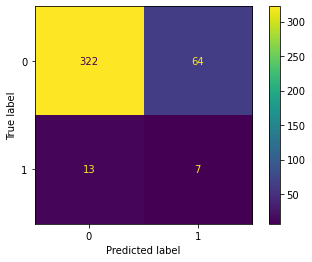

In [164]:
#Matriz de confusión
cm_val = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()
plt.show()

In [165]:
cm_val

array([[322,  64],
       [ 13,   7]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [166]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_val[1,1]
#Falsos negativos
FN = cm_val[1,0]
#Falsos negativos
FP = cm_val[0,1]
#Verdaderos negativos
TN = cm_val[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8103448275862069
La precisión es de: 0.09859154929577464
La sensibilidad es de: 0.35
La especificidad es de: 0.8341968911917098


In [167]:
print(TP)
print(FN)

7
13


- AUC y curva ROC

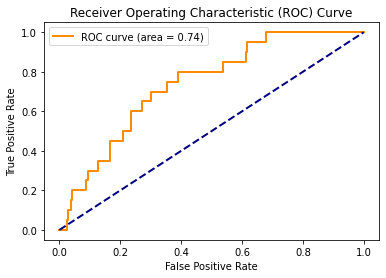

In [168]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, gb_model.predict_proba(x_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de Gradient boost trees en el conjunto de prueba

In [169]:
y_pred_test = gb_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       386
           1       0.21      0.62      0.31        21

    accuracy                           0.86       407
   macro avg       0.59      0.74      0.62       407
weighted avg       0.94      0.86      0.89       407



- Matriz de confusión

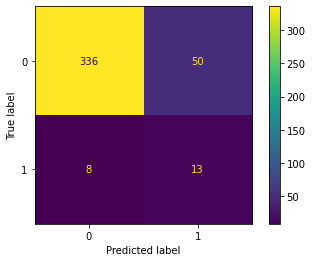

In [170]:
#Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [171]:
cm_test

array([[336,  50],
       [  8,  13]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [172]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_test[1,1]
#Falsos negativos
FN = cm_test[1,0]
#Falsos negativos
FP = cm_test[0,1]
#Verdaderos negativos
TN = cm_test[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8574938574938575
La precisión es de: 0.20634920634920634
La sensibilidad es de: 0.6190476190476191
La especificidad es de: 0.8704663212435233


In [173]:
print(TP)
print(FN)

13
8


- AUC y curva ROC

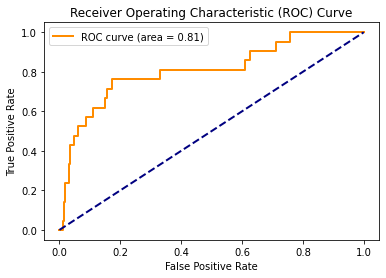

In [174]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### 5.3 Optimización de hiperparámetros - Support vector machines 

Se eligió para optimizar sus hiperparámetros el modelo support vecor machine. 

Para el proceso de selección, se utilizó una búsqueda en grid estableciendo cada uno de los hipeparámetros en los que el proceso irá buscando el mejor con K-fold Cross validation (K=3) con el conjunto de entrenamiento.

La métrica de evaluación para comparar los resultados obtenidos fue F1-score.

Una vez encontrado los hipeparámetros óptimos se entrenó el modelo con estos y se calcularon las métricas para evaluar el modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc_model = svm.SVC(random_state=0)

In [181]:
#grid = { 
    #"kernel": ["linear", "poly", "rbf", "sigmoid"],
    #"degree": [2, 3, 4],
    #"C": [0.01, 0.05, 0.1, 0.5, 1, 2, 5]
#}
#model_CV = GridSearchCV(estimator=svc_model, param_grid=grid, cv= 3, verbose=3, scoring="f1_macro")
#model_CV.fit(x_over, y_over)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV 1/3] END ...C=0.01, degree=2, kernel=linear;, score=0.755 total time=   1.6s
[CV 2/3] END ...C=0.01, degree=2, kernel=linear;, score=0.751 total time=   1.3s
[CV 3/3] END ...C=0.01, degree=2, kernel=linear;, score=0.718 total time=   1.5s
[CV 1/3] END .....C=0.01, degree=2, kernel=poly;, score=0.646 total time=   1.0s
[CV 2/3] END .....C=0.01, degree=2, kernel=poly;, score=0.618 total time=   1.1s
[CV 3/3] END .....C=0.01, degree=2, kernel=poly;, score=0.621 total time=   0.9s
[CV 1/3] END ......C=0.01, degree=2, kernel=rbf;, score=0.696 total time=   2.1s
[CV 2/3] END ......C=0.01, degree=2, kernel=rbf;, score=0.680 total time=   2.6s
[CV 3/3] END ......C=0.01, degree=2, kernel=rbf;, score=0.678 total time=   2.3s
[CV 1/3] END ..C=0.01, degree=2, kernel=sigmoid;, score=0.349 total time=   2.0s
[CV 2/3] END ..C=0.01, degree=2, kernel=sigmoid;, score=0.476 total time=   2.1s
[CV 3/3] END ..C=0.01, degree=2, kernel=sigmoid

[CV 3/3] END ......C=0.1, degree=4, kernel=poly;, score=0.700 total time=   1.0s
[CV 1/3] END .......C=0.1, degree=4, kernel=rbf;, score=0.719 total time=   1.6s
[CV 2/3] END .......C=0.1, degree=4, kernel=rbf;, score=0.715 total time=   1.6s
[CV 3/3] END .......C=0.1, degree=4, kernel=rbf;, score=0.691 total time=   1.6s
[CV 1/3] END ...C=0.1, degree=4, kernel=sigmoid;, score=0.414 total time=   1.9s
[CV 2/3] END ...C=0.1, degree=4, kernel=sigmoid;, score=0.427 total time=   1.6s
[CV 3/3] END ...C=0.1, degree=4, kernel=sigmoid;, score=0.687 total time=   1.2s
[CV 1/3] END ....C=0.5, degree=2, kernel=linear;, score=0.750 total time=  18.7s
[CV 2/3] END ....C=0.5, degree=2, kernel=linear;, score=0.751 total time=  28.8s
[CV 3/3] END ....C=0.5, degree=2, kernel=linear;, score=0.718 total time=  15.6s
[CV 1/3] END ......C=0.5, degree=2, kernel=poly;, score=0.734 total time=   0.7s
[CV 2/3] END ......C=0.5, degree=2, kernel=poly;, score=0.721 total time=   0.7s
[CV 3/3] END ......C=0.5, de

[CV 3/3] END .....C=2, degree=3, kernel=sigmoid;, score=0.670 total time=   0.6s
[CV 1/3] END ......C=2, degree=4, kernel=linear;, score=0.761 total time=  57.3s
[CV 2/3] END ......C=2, degree=4, kernel=linear;, score=0.751 total time= 3.3min
[CV 3/3] END ......C=2, degree=4, kernel=linear;, score=0.718 total time= 2.0min
[CV 1/3] END ........C=2, degree=4, kernel=poly;, score=0.731 total time=   2.7s
[CV 2/3] END ........C=2, degree=4, kernel=poly;, score=0.726 total time=   2.6s
[CV 3/3] END ........C=2, degree=4, kernel=poly;, score=0.714 total time=   2.8s
[CV 1/3] END .........C=2, degree=4, kernel=rbf;, score=0.720 total time=   3.6s
[CV 2/3] END .........C=2, degree=4, kernel=rbf;, score=0.723 total time=   3.3s
[CV 3/3] END .........C=2, degree=4, kernel=rbf;, score=0.700 total time=   3.1s
[CV 1/3] END .....C=2, degree=4, kernel=sigmoid;, score=0.410 total time=   2.5s
[CV 2/3] END .....C=2, degree=4, kernel=sigmoid;, score=0.414 total time=   2.5s
[CV 3/3] END .....C=2, degre

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_macro', verbose=3)

In [182]:
#print(model_CV.best_score_)
#print(model_CV.best_params_)

0.7451001010488253
{'C': 0.05, 'degree': 2, 'kernel': 'linear'}


In [183]:
svc_model = svm.SVC(random_state=0, kernel="linear", C=0.05, degree=2, probability=True)
svc_model.fit(x_over, y_over)

SVC(C=0.05, degree=2, kernel='linear', probability=True, random_state=0)

##### Evaluación del modelo de Support vector machines en el conjunto de entrenamiento

In [184]:
y_pred_train = svc_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      3085
           1       0.12      0.79      0.22       166

    accuracy                           0.71      3251
   macro avg       0.55      0.75      0.52      3251
weighted avg       0.94      0.71      0.79      3251



- Matriz de confusión

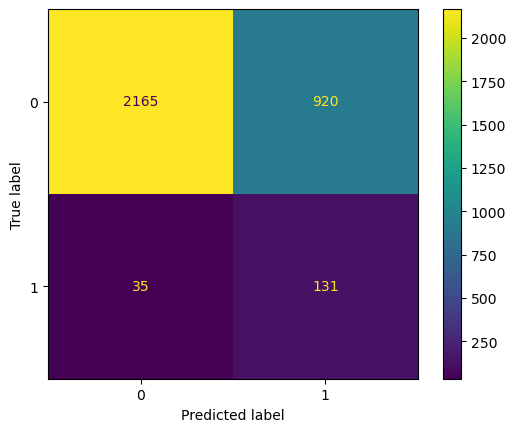

In [185]:
#Matriz de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [186]:
cm_train

array([[2165,  920],
       [  35,  131]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [187]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_train[1,1]
#Falsos negativos
FN = cm_train[1,0]
#Falsos negativos
FP = cm_train[0,1]
#Verdaderos negativos
TN = cm_train[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.7062442325438326
La precisión es de: 0.12464319695528069
La sensibilidad es de: 0.7891566265060241
La especificidad es de: 0.7017828200972447


In [188]:
print(TP)
print(FN)

131
35


- AUC y curva ROC

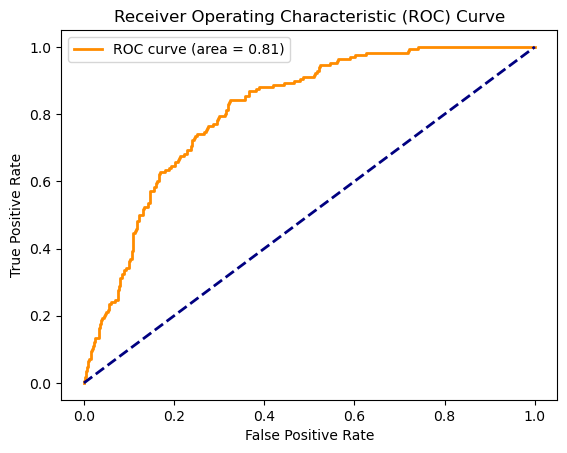

In [189]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, svc_model.predict_proba(x_train)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de Support vector machines en el conjunto de validación

In [190]:
y_pred_val = svc_model.predict(x_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       386
           1       0.12      0.85      0.21        20

    accuracy                           0.68       406
   macro avg       0.55      0.76      0.50       406
weighted avg       0.95      0.68      0.77       406



- Matriz de confusión

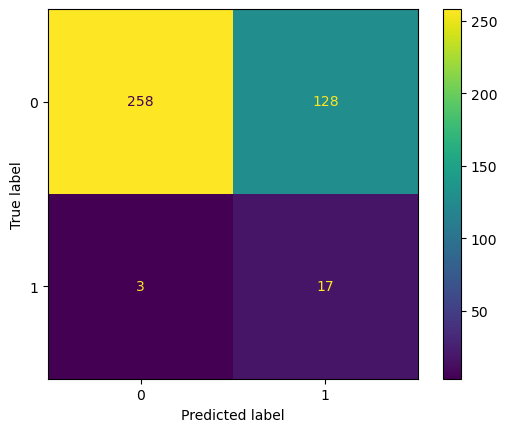

In [191]:
#Matriz de confusión
cm_val = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()
plt.show()

In [192]:
cm_val

array([[258, 128],
       [  3,  17]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [193]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_val[1,1]
#Falsos negativos
FN = cm_val[1,0]
#Falsos negativos
FP = cm_val[0,1]
#Verdaderos negativos
TN = cm_val[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.6773399014778325
La precisión es de: 0.11724137931034483
La sensibilidad es de: 0.85
La especificidad es de: 0.6683937823834197


In [194]:
print(TP)
print(FN)

17
3


- AUC y curva ROC

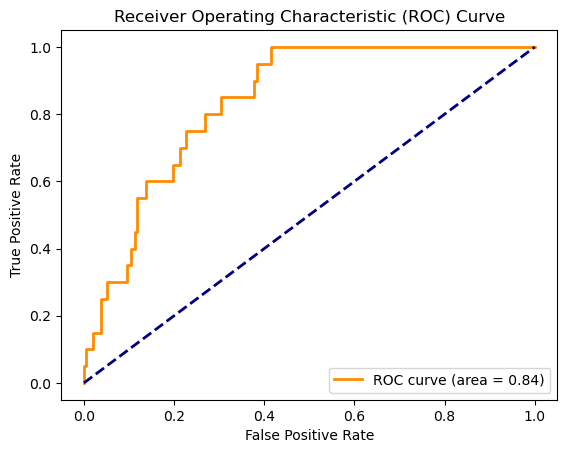

In [195]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, svc_model.predict_proba(x_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de Support vector machines en el conjunto de prueba

In [196]:
y_pred_test = svc_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       386
           1       0.14      0.81      0.24        21

    accuracy                           0.73       407
   macro avg       0.56      0.77      0.54       407
weighted avg       0.94      0.73      0.80       407



- Matriz de confusión

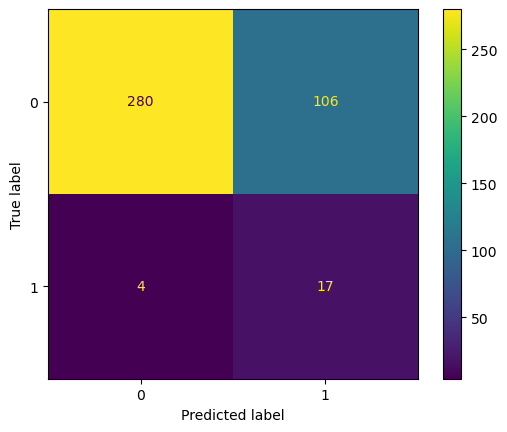

In [197]:
#Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [198]:
cm_test

array([[280, 106],
       [  4,  17]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [199]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_test[1,1]
#Falsos negativos
FN = cm_test[1,0]
#Falsos negativos
FP = cm_test[0,1]
#Verdaderos negativos
TN = cm_test[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.7297297297297297
La precisión es de: 0.13821138211382114
La sensibilidad es de: 0.8095238095238095
La especificidad es de: 0.7253886010362695


In [200]:
print(TP)
print(FN)

17
4


- AUC y curva ROC

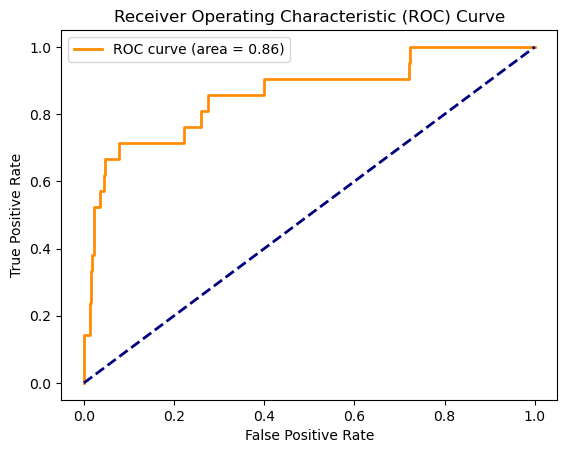

In [201]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### 5.4 Optimización de hiperparámetros - DecisionTreeClassifier

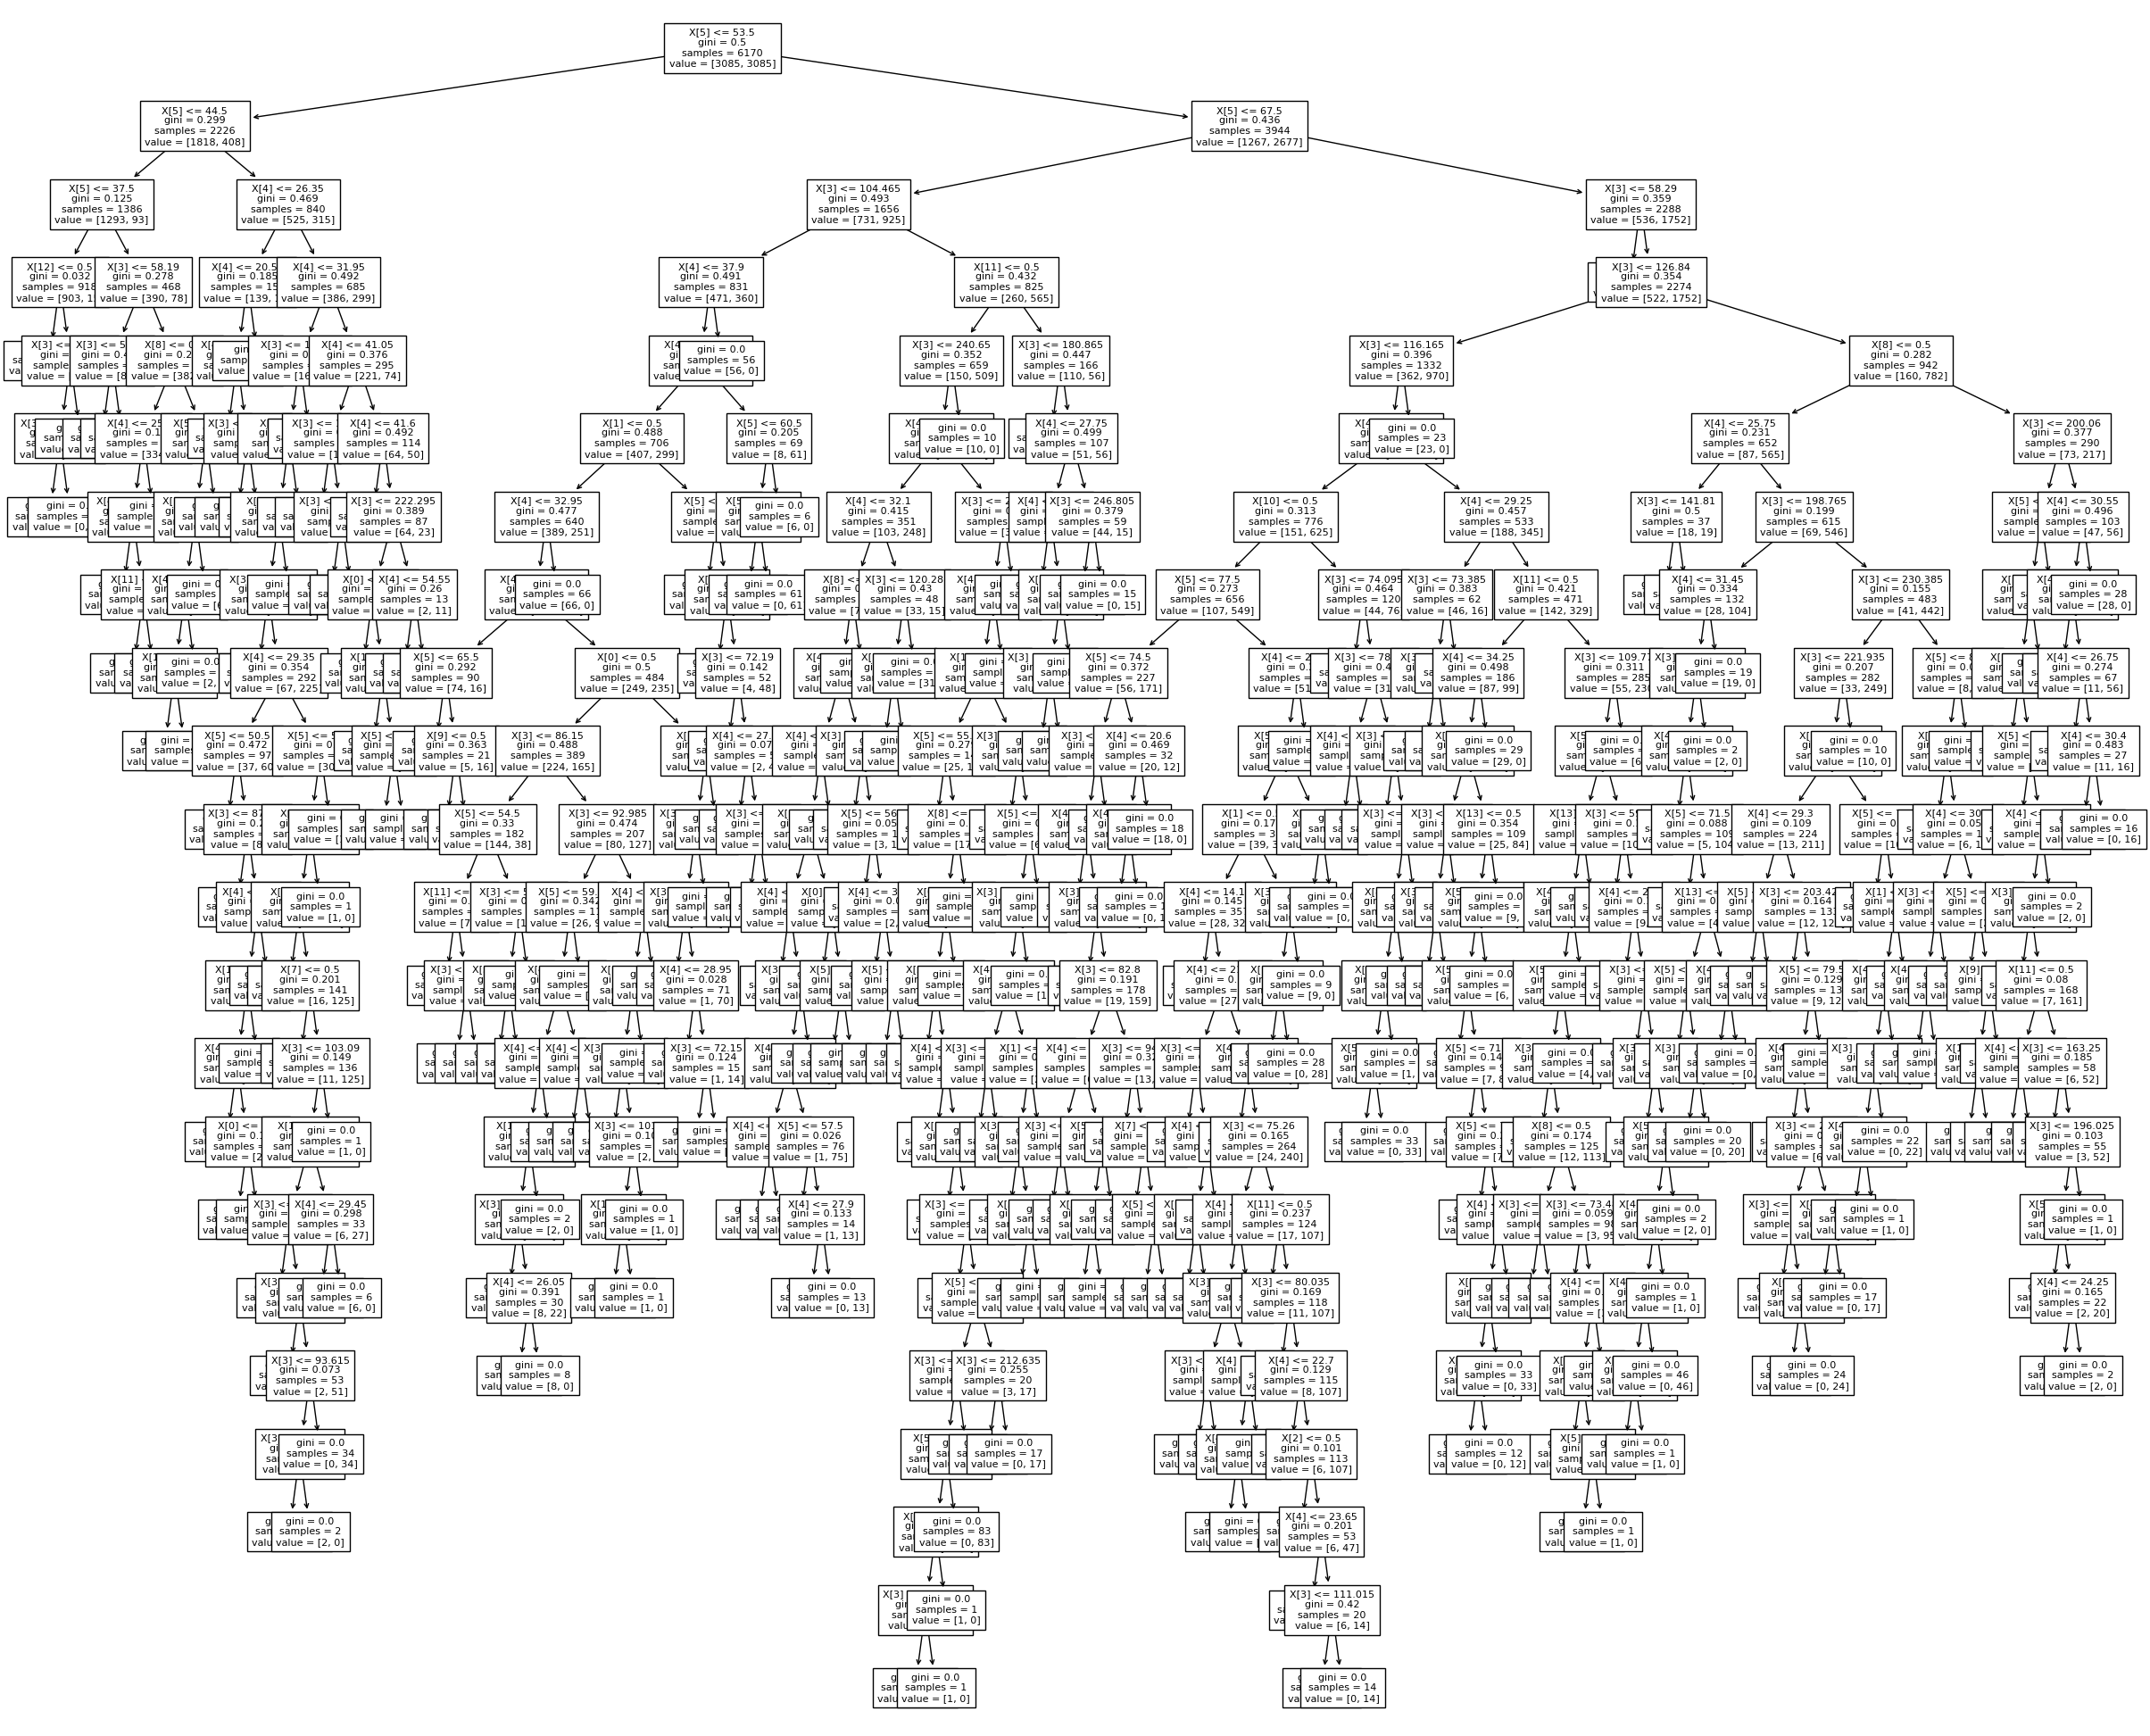

In [203]:
from sklearn import tree
#Definir un árbol de decisión
fullClassTree = DecisionTreeClassifier()
#Entrenar al modelo 
fullClassTree.fit(x_over,y_over)

#Graficar el árbol de decisión
plt.figure(figsize=(30,25)) 

tree.plot_tree(fullClassTree, fontsize=8)
#mostar el árbol
plt.show()

In [205]:
y_pred_train = fullClassTree.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3085
           1       1.00      1.00      1.00       166

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251



In [206]:
y_pred_val = fullClassTree.predict(x_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       386
           1       0.12      0.15      0.14        20

    accuracy                           0.91       406
   macro avg       0.54      0.55      0.54       406
weighted avg       0.91      0.91      0.91       406



In [207]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}

#Aplicar el método de búsqueda de hiperparametrización
rand_sr = RandomizedSearchCV(DecisionTreeClassifier(),param_grid)
#Entrenar al modelo
rand_sr.fit(x_over,y_over)

print('Improved score: ', rand_sr.best_score_)
print('Improved parameters: ',rand_sr.best_params_)

# Retornar el árbol de decisión con mejor accuracy
bestClassTree = rand_sr.best_estimator_

classificationSummary(y_train, bestClassTree.predict(x_train))
classificationSummary(y_val, bestClassTree.predict(x_val))

Improved score:  0.9102106969205834
Improved parameters:  {'min_samples_split': 10, 'min_impurity_decrease': 0.0009, 'max_depth': 15}
Confusion Matrix (Accuracy 0.8847)

       Prediction
Actual    0    1
     0 2711  374
     1    1  165
Confusion Matrix (Accuracy 0.8177)

       Prediction
Actual   0   1
     0 322  64
     1  10  10


##### Evaluación del modelo de DecisionTreeClassifier en el conjunto de entrenamiento

In [208]:
y_pred_train = bestClassTree.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3085
           1       0.31      0.99      0.47       166

    accuracy                           0.88      3251
   macro avg       0.65      0.94      0.70      3251
weighted avg       0.96      0.88      0.91      3251



- Matriz de confusión

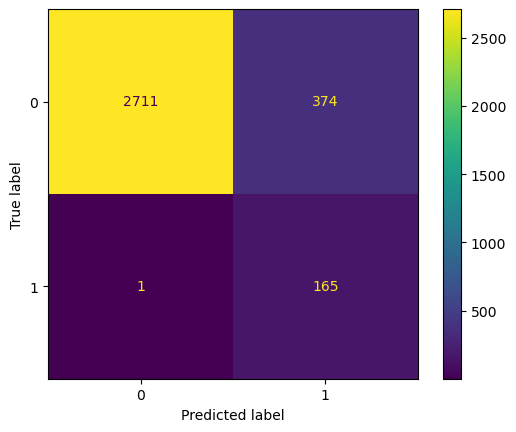

In [209]:
#Matriz de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [211]:
cm_train

array([[2711,  374],
       [   1,  165]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [212]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_train[1,1]
#Falsos negativos
FN = cm_train[1,0]
#Falsos negativos
FP = cm_train[0,1]
#Verdaderos negativos
TN = cm_train[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8846508766533374
La precisión es de: 0.30612244897959184
La sensibilidad es de: 0.9939759036144579
La especificidad es de: 0.8787682333873582


In [213]:
print(TP)
print(FN)

165
1


- AUC y curva ROC

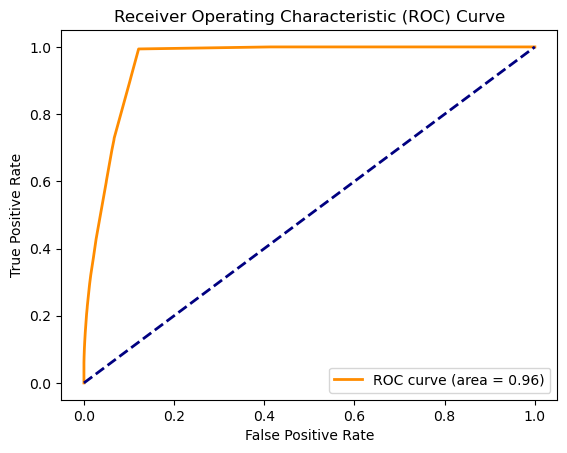

In [214]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, bestClassTree.predict_proba(x_train)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de DecisionTreeClassifier en el conjunto de validación

In [215]:
y_pred_val = bestClassTree.predict(x_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       386
           1       0.14      0.50      0.21        20

    accuracy                           0.82       406
   macro avg       0.55      0.67      0.55       406
weighted avg       0.93      0.82      0.86       406



- Matriz de confusión

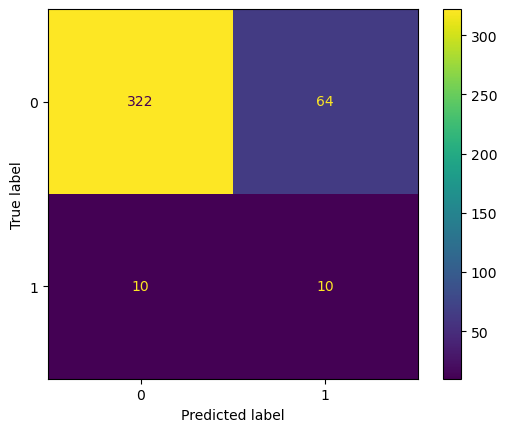

In [216]:
#Matriz de confusión
cm_val = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()
plt.show()

In [217]:
cm_val

array([[322,  64],
       [ 10,  10]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [218]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_val[1,1]
#Falsos negativos
FN = cm_val[1,0]
#Falsos negativos
FP = cm_val[0,1]
#Verdaderos negativos
TN = cm_val[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8177339901477833
La precisión es de: 0.13513513513513514
La sensibilidad es de: 0.5
La especificidad es de: 0.8341968911917098


In [219]:
print(TP)
print(FN)

10
10


- AUC y curva ROC

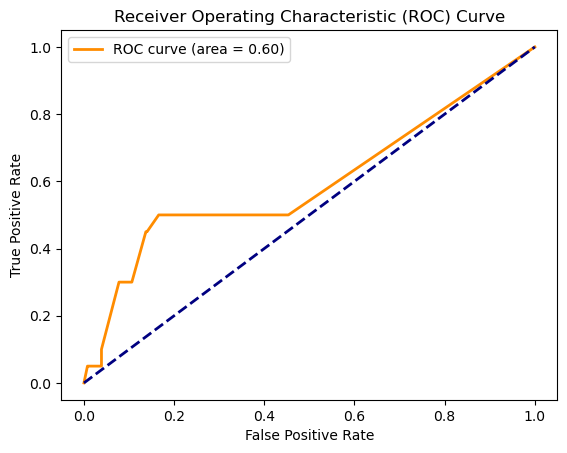

In [220]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, bestClassTree.predict_proba(x_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

##### Evaluación del modelo de DecisionTreeClassifier en el conjunto de prueba

In [221]:
y_pred_test = bestClassTree.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       386
           1       0.19      0.48      0.27        21

    accuracy                           0.87       407
   macro avg       0.58      0.68      0.60       407
weighted avg       0.93      0.87      0.89       407



- Matriz de confusión

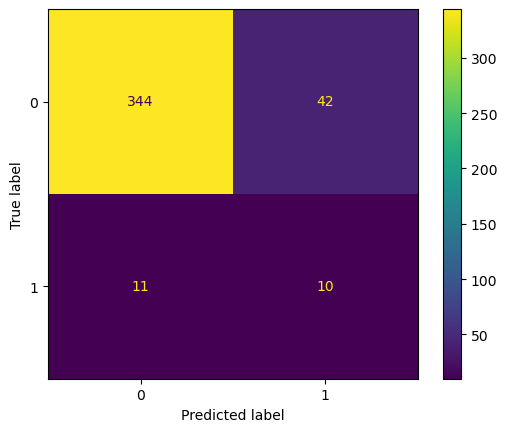

In [222]:
#Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [223]:
cm_test

array([[344,  42],
       [ 11,  10]], dtype=int64)

- Cálculo de exactitud, sensibilidad, especificidad y precisión 

In [224]:
#Cáculamos el valor de las clasificaciones de la matriz de confusión
#Verdaderos positivos
TP = cm_test[1,1]
#Falsos negativos
FN = cm_test[1,0]
#Falsos negativos
FP = cm_test[0,1]
#Verdaderos negativos
TN = cm_test[0,0]
# Cálculo de la exactitud
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Cálculo de la precisión
precision = TP/(TP + FP)
# Cálculo de la sensibilidad
sensitivity = TP/(TP + FN)
# Cálculo de la especificidad
specificity = TN/(TN + FP)
print("La exactitud es de:", accuracy )
print("La precisión es de:", precision )
print("La sensibilidad es de:", sensitivity )
print("La especificidad es de:", specificity )

La exactitud es de: 0.8697788697788698
La precisión es de: 0.19230769230769232
La sensibilidad es de: 0.47619047619047616
La especificidad es de: 0.8911917098445595


In [225]:
print(TP)
print(FN)

10
11


- AUC y curva ROC

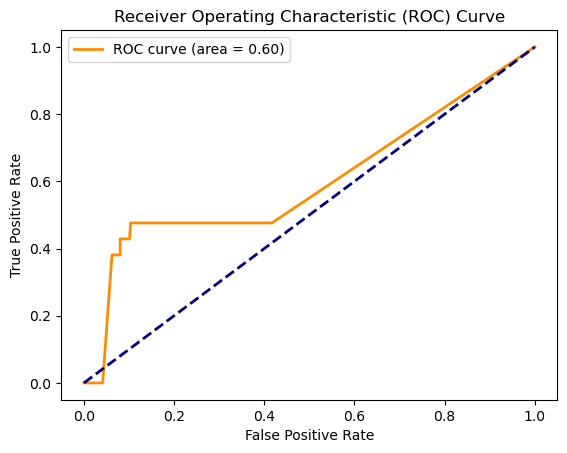

In [226]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, bestClassTree.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

#### Conclusión: El mejor modelo es Support vector machine con Optimización de hiperparámetros, nos fijamos en el sensibility o recall score para la clase (1) que es tener un stroke

#### Referencias
#### “Árboles de Decisión Con Boosting Del Gradiente | Machine Learning.” Google Developers, 11 Apr. 2023, developers.google.com/machine-learning/decision-forests/intro-to-gbdt?hl=es-419. Accessed 11 Apr. 2023.

### 6.4 Selección de variables predictivas más importantes para la predicción con Random Forest

In [123]:
# importar paquetes importantes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


Se utiliza el Random Forest de la siguiente forma:

In [124]:
#Se aplica el algoritmo de Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=2)
#Se utilizan los datos de entrenamiento para ajustar el modelo, pero con los descubiertos de la mejor estrategia de entrenamiento
rf_model.fit(x_over, y_over)
#Predicción en el conjunto de prueba
y_pred = rf_model.predict(x_test)

Se aplica el feature_importances_ del algoritmo de Random Forest para ver las importancias de las variables predictivas

In [125]:
#se crea una tabla donde se ordena de forma descendente dependiendo de la importancia de las variables de predicción
X = cleaned_data_final_new.drop("Stroke", axis=1)
feature_importances_df = pd.DataFrame({"Feature": list(X.columns),
                                       "Importance": rf_model.feature_importances_}
                                     ).sort_values("Importance", ascending=False)

# Mostrar
feature_importances_df

,Feature,Importance
5,Age,0.362325
3,Avg_glucose_level,0.227838
4,Bmi,0.187030
0,Hypertension,0.033493
9,Residence_Urban,0.025476
13,Gender_Male,0.025223
11,Smoking_never smoked,0.023957
2,Married,0.020498
1,Heart Disease,0.020498
7,Work_Private,0.020121


Para visualizar las importancias de las variables, se crea un diagrama de barras

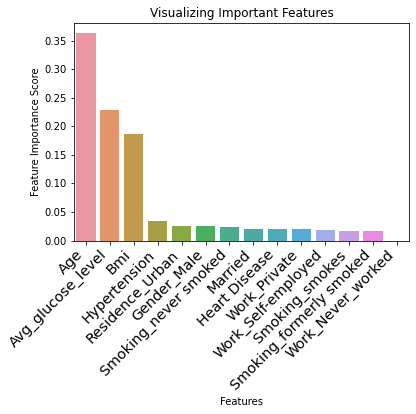

In [126]:
# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.Feature, y=feature_importances_df.Importance)
# agregar estiquestas
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
#se muestra el diagrama
plt.show()

#### Conclusión: Se observa que las variables predictivas más importantes para la predicción son Age, Avg_glucose_level, y Bmi, ya que sobresalen dentro de la gráfica de barras y en la tabla de importantcias estas variables ocupan los primeros 3 puestos de mayor importancia. Las otras variables no contribuyen mucho a la predicción y la variable Work_Never_worked no aporta casi nada a la predicción.

#### Referencia:

Cardellino, F. (2021). Tutorial para un clasificador basado en bosques aleatorios: cómo utilizar algoritmos basados en árboles para el aprendizaje automático. FreeCodeCamp. https://www.freecodecamp.org/espanol/news/random-forest-classifier-tutorial-how-to-use-tree-based-algorithms-for-machine-learning/